## Project Name: House Prices: Advanced Regression Techniques

##### Problem Statement ##############

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement
 ceiling or the proximity to an east-west railroad.But this playground competition's dataset proves that
much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa,
this competition challenges you to predict the final price of each home.


**The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead**

#### Dataset to downloaded from the below link
# **https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data**

In [ ]:
##3 Importing libraries
import pandas as pd ## data preprocessing
import numpy as np  ## mathmatical calculation
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option('display.max_columns' , None)
#pd.pandas.set_option('display.max_rows' , None)




import warnings
warnings.filterwarnings("ignore")

In [ ]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [ ]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [ ]:
train.shape

(1460, 81)

In [ ]:
test.shape

(1459, 80)

In [ ]:
df_train = pd.concat([train, test])
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [ ]:
df_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1455          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1456          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

In [ ]:
df_train.shape

(2919, 81)

### **EDA and Feature Engineering**

In [ ]:
duplicate = df_train[df_train.duplicated()]
duplicate

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [ ]:
print(duplicate)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.iloc[1450:1470,:]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1450  1451          90       RL         60.0     9000   Pave   NaN      Reg   
1451  1452          20       RL         78.0     9262   Pave   NaN      Reg   
1452  1453         180       RM         35.0     3675   Pave   NaN      Reg   
1453  1454          20       RL         90.0    17217   Pave   NaN      Reg   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
5     1466          60       RL         75.0    10000   Pave   NaN      IR1   
6     1467          20       RL          NaN     7980   Pave   NaN      IR1   
7     1468          60       RL         63.0     8402   Pave   NaN      IR1   
8     1469          20       RL         85.0    10176   Pave   NaN      Reg   
9     1470          20       RL         70.0     8400   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1450         Lvl    AllPub       FR2       Gtl        NAmes       Norm   
1451         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1452         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1453         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1454         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
5            Lvl    AllPub    Corner       Gtl      Gilbert       Norm   
6            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
7            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
8            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
9            Lvl    AllPub    Corner       Gtl        NAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1450       Norm   Duplex     2Story            5            5       1974   
1451       Norm     1Fam     1Story            8            5       2008   
1452       Norm   TwnhsE       SLvl            5            5       2005   
1453       Norm     1Fam     1Story            5            5       2006   
1454       Norm     1Fam     1Story            7            5       2004   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Sto

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

### **Handling numerical  Missing values**

In [ ]:
len(df_train.columns.unique()), df_train.columns.unique()

(81,
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'Garag

In [ ]:
missing_values_continious = [feature for feature in df_train.columns if df_train[feature].dtype != "O" and len(df_train[feature].unique()) > 20 and df_train[feature].isnull().sum()>0]
missing_values_continious

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageYrBlt',
 'GarageArea',
 'SalePrice']

In [ ]:
len(df_train["LotFrontage"].unique())

129

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:

missing_values_continious = []
for feature in df_train.columns:
    if df_train[feature].dtype != "object" and len(df_train[feature].unique())>20:
        missing_values_continious.append(feature)
missing_values_continious

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [ ]:
df_train['LotFrontage'].isnull().sum()

486

In [ ]:
df_train['LotFrontage'].isnull().mean()

0.16649537512846865

In [ ]:
for feature in missing_values_continious:
    print(f'{feature} = {df_train[feature].isnull().mean() * 100} %')

Id = 0.0 %
LotFrontage = 16.649537512846866 %
LotArea = 0.0 %
YearBuilt = 0.0 %
YearRemodAdd = 0.0 %
MasVnrArea = 0.7879410757108599 %
BsmtFinSF1 = 0.0342583076396026 %
BsmtFinSF2 = 0.0342583076396026 %
BsmtUnfSF = 0.0342583076396026 %
TotalBsmtSF = 0.0342583076396026 %
1stFlrSF = 0.0 %
2ndFlrSF = 0.0 %
LowQualFinSF = 0.0 %
GrLivArea = 0.0 %
GarageYrBlt = 5.4470709146968135 %
GarageArea = 0.0342583076396026 %
WoodDeckSF = 0.0 %
OpenPorchSF = 0.0 %
EnclosedPorch = 0.0 %
3SsnPorch = 0.0 %
ScreenPorch = 0.0 %
MiscVal = 0.0 %
SalePrice = 49.9828708461802 %


In [ ]:
  for feature in missing_values_continious:
    print(f'{feature} = {round(df_train[feature].isnull().mean() , 2) * 100} %')

Id = 0.0 %
LotFrontage = 17.0 %
LotArea = 0.0 %
YearBuilt = 0.0 %
YearRemodAdd = 0.0 %
MasVnrArea = 1.0 %
BsmtFinSF1 = 0.0 %
BsmtFinSF2 = 0.0 %
BsmtUnfSF = 0.0 %
TotalBsmtSF = 0.0 %
1stFlrSF = 0.0 %
2ndFlrSF = 0.0 %
LowQualFinSF = 0.0 %
GrLivArea = 0.0 %
GarageYrBlt = 5.0 %
GarageArea = 0.0 %
WoodDeckSF = 0.0 %
OpenPorchSF = 0.0 %
EnclosedPorch = 0.0 %
3SsnPorch = 0.0 %
ScreenPorch = 0.0 %
MiscVal = 0.0 %
SalePrice = 50.0 %


In [ ]:
median_value = df_train["GarageYrBlt"].median()

In [ ]:
median_value

1979.0

In [ ]:
for feature in missing_values_continious:
    if feature == "SalePrice":
        pass
    else:
        median_value = df_train[feature].median()
        df_train[feature].fillna(median_value,inplace=True)

In [ ]:
for feature in missing_values_continious:
    print(feature, round(df_train[feature].isnull().mean(),4)*100)

Id 0.0
LotFrontage 0.0
LotArea 0.0
YearBuilt 0.0
YearRemodAdd 0.0
MasVnrArea 0.0
BsmtFinSF1 0.0
BsmtFinSF2 0.0
BsmtUnfSF 0.0
TotalBsmtSF 0.0
1stFlrSF 0.0
2ndFlrSF 0.0
LowQualFinSF 0.0
GrLivArea 0.0
GarageYrBlt 0.0
GarageArea 0.0
WoodDeckSF 0.0
OpenPorchSF 0.0
EnclosedPorch 0.0
3SsnPorch 0.0
ScreenPorch 0.0
MiscVal 0.0
SalePrice 49.980000000000004


In [ ]:
df_train.shape

(2919, 81)

In [ ]:
df_train.drop("Id" , inplace=True , axis = 1)

In [ ]:
df_train.shape

(2919, 80)

# **2. For Descrete** **bold text**

In [ ]:
missing_values_descrete = [feature for feature in df_train.columns if df_train[feature].dtype != "O" and len(df_train[feature].unique()) <20 and df_train[feature].isnull().sum()>0]
missing_values_descrete

['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']

In [ ]:
missing_values_descrete = []
for feature in df_train.columns:
    if df_train[feature].dtype != "object" and len(df_train[feature].unique()) <=20:
        missing_values_descrete.append(feature)
len(missing_values_descrete)

15

In [ ]:
for feature in missing_values_descrete:
    print(f' {feature} = {df_train[feature].isnull().mean()*100} %')

 MSSubClass = 0.0 %
 OverallQual = 0.0 %
 OverallCond = 0.0 %
 BsmtFullBath = 0.0685166152792052 %
 BsmtHalfBath = 0.0685166152792052 %
 FullBath = 0.0 %
 HalfBath = 0.0 %
 BedroomAbvGr = 0.0 %
 KitchenAbvGr = 0.0 %
 TotRmsAbvGrd = 0.0 %
 Fireplaces = 0.0 %
 GarageCars = 0.0342583076396026 %
 PoolArea = 0.0 %
 MoSold = 0.0 %
 YrSold = 0.0 %


In [ ]:
for feature in missing_values_descrete:
    print(f' {feature} = {round(df_train[feature].isnull().mean(),4)*100} %')

 MSSubClass = 0.0 %
 OverallQual = 0.0 %
 OverallCond = 0.0 %
 BsmtFullBath = 0.06999999999999999 %
 BsmtHalfBath = 0.06999999999999999 %
 FullBath = 0.0 %
 HalfBath = 0.0 %
 BedroomAbvGr = 0.0 %
 KitchenAbvGr = 0.0 %
 TotRmsAbvGrd = 0.0 %
 Fireplaces = 0.0 %
 GarageCars = 0.03 %
 PoolArea = 0.0 %
 MoSold = 0.0 %
 YrSold = 0.0 %


In [ ]:
df_train["GarageCars"].value_counts()

GarageCars
2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: count, dtype: int64

In [ ]:
df_train["GarageCars"].mode()

0    2.0
Name: GarageCars, dtype: float64

In [ ]:
df_train["GarageCars"].mode()[0]

2.0

In [ ]:
for feature in missing_values_descrete:
         mode_value = df_train[feature].mode()[0]
         df_train[feature].fillna(mode_value,inplace=True)

In [ ]:
for feature in missing_values_descrete:
    print(f' {feature} = {round(df_train[feature].isnull().mean(),4)*100} %')

 MSSubClass = 0.0 %
 OverallQual = 0.0 %
 OverallCond = 0.0 %
 BsmtFullBath = 0.0 %
 BsmtHalfBath = 0.0 %
 FullBath = 0.0 %
 HalfBath = 0.0 %
 BedroomAbvGr = 0.0 %
 KitchenAbvGr = 0.0 %
 TotRmsAbvGrd = 0.0 %
 Fireplaces = 0.0 %
 GarageCars = 0.0 %
 PoolArea = 0.0 %
 MoSold = 0.0 %
 YrSold = 0.0 %


### Handling categorical missing values

In [ ]:
missing_values_c = [feature for feature in df_train.columns if df_train[feature].dtype == "O" and df_train[feature].isnull().sum()>0]
missing_values_c

['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [ ]:
missing_values_c = []
for feature in df_train.columns:
    if df_train[feature].dtype == "O" and df_train[feature].isnull().sum()>0:
        missing_values_c.append(feature)
len(missing_values_c)

23

In [ ]:
for feature in missing_values_c:
    print(f' {feature} = {round(df_train[feature].isnull().mean(),4)*100} %')

 MSZoning = 0.13999999999999999 %
 Alley = 93.22 %
 Utilities = 0.06999999999999999 %
 Exterior1st = 0.03 %
 Exterior2nd = 0.03 %
 MasVnrType = 60.5 %
 BsmtQual = 2.77 %
 BsmtCond = 2.81 %
 BsmtExposure = 2.81 %
 BsmtFinType1 = 2.71 %
 BsmtFinType2 = 2.74 %
 Electrical = 0.03 %
 KitchenQual = 0.03 %
 Functional = 0.06999999999999999 %
 FireplaceQu = 48.65 %
 GarageType = 5.38 %
 GarageFinish = 5.45 %
 GarageQual = 5.45 %
 GarageCond = 5.45 %
 PoolQC = 99.66000000000001 %
 Fence = 80.44 %
 MiscFeature = 96.39999999999999 %
 SaleType = 0.03 %


In [ ]:
df_train['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [ ]:
for feature in missing_values_c:
         mode_value = df_train[feature].mode()[0]
         df_train[feature].fillna(mode_value,inplace=True)
df_train.drop(["Alley" ,"PoolQC", "Fence", "MiscFeature", "FireplaceQu" ] , axis = 1 , inplace = True)

In [ ]:
pd.pandas.set_option('display.max_rows' , None)

In [ ]:
df_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [ ]:
df_train.shape

(2919, 75)

In [ ]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd    BrkFace         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng    BrkFace         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   
3          Gd          

# **Handling year feature**

In [ ]:
year = [feature for feature in df_train.columns if "Yr" in feature or "Year" in feature]
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
year = []
for feature in df_train.columns:
    if "Yr" in feature or "Year" in feature:
        year.append(feature)
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
for feature in year:
    print(f' {feature}    >>>>   len of data: {len(df_train[feature].unique())}    >>>> {df_train[feature].dtype}')

 YearBuilt    >>>>   len of data: 118    >>>> int64
 YearRemodAdd    >>>>   len of data: 61    >>>> int64
 GarageYrBlt    >>>>   len of data: 103    >>>> float64
 YrSold    >>>>   len of data: 5    >>>> int64


In [ ]:
df_train["YrSold"].value_counts()

YrSold
2007    692
2009    647
2008    622
2006    619
2010    339
Name: count, dtype: int64

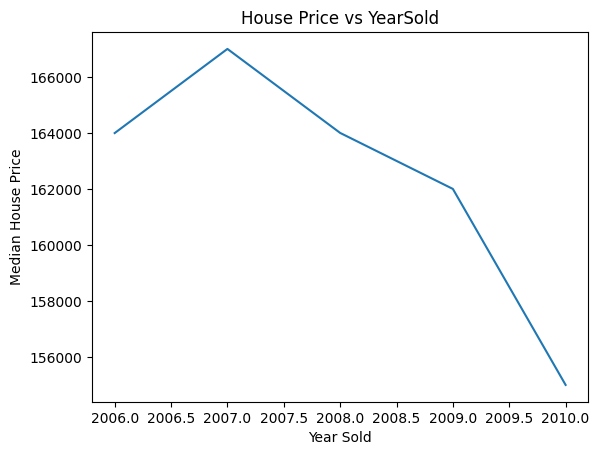

In [ ]:
df_train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")
plt.show()

In [ ]:
year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [ ]:
df_train[year].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

In [ ]:
for feature in year:
    df_train[feature] = df_train['YrSold']-df_train[feature]
df_train.drop("YrSold", axis = 1 , inplace = True)

In [ ]:
df_train.shape

(2919, 74)

In [ ]:
df_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

In [ ]:
df_train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd    BrkFace         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng    BrkFace         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd          5.0   
1          TA             6        Typ           1     Attchd         31.0   
2          Gd             6        Typ           1     Attchd          7.0   
3          Gd          

# **Handling continious values**

In [ ]:
continious = [feature for feature in df_train.columns if len(df_train[feature].unique())>20 and df_train[feature].dtype != "O" and feature not in year]
continious

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [ ]:
continious = []
for feature in df_train.columns:
     if df_train[feature].dtype != "O" and len(df_train[feature].unique())>20  and feature not in year:
            continious.append(feature)
continious

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [ ]:
  df_train["LotFrontage"].skew()

1.6757127932619122

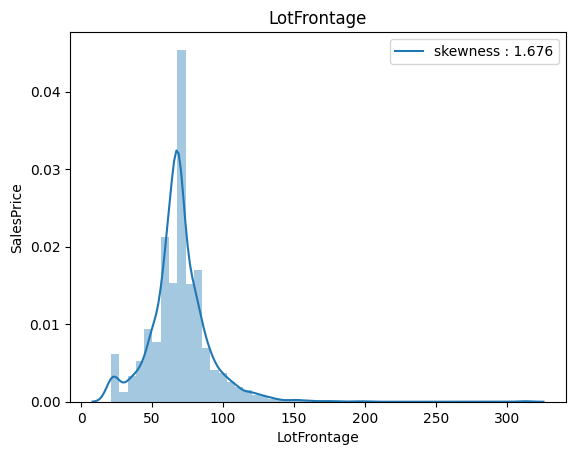

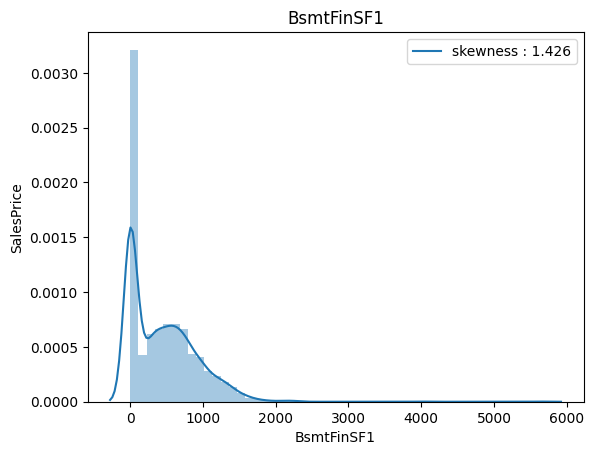

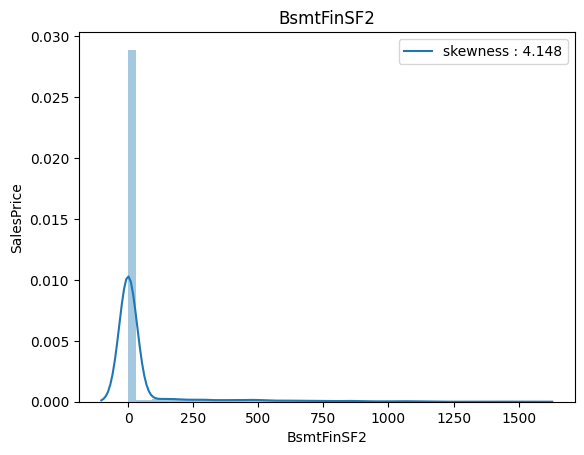

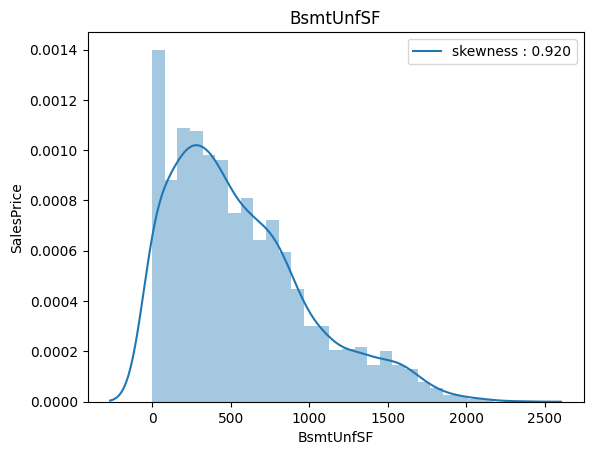

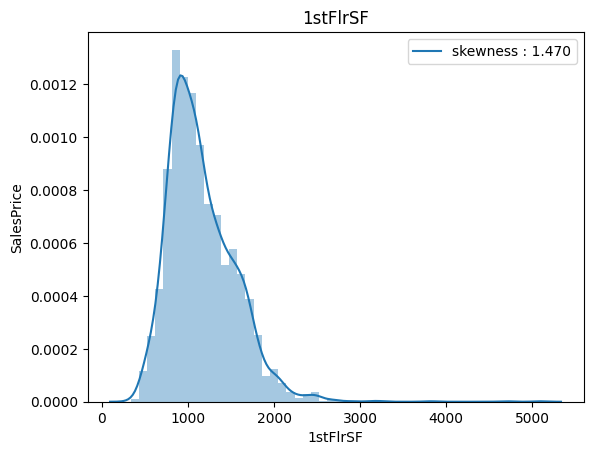

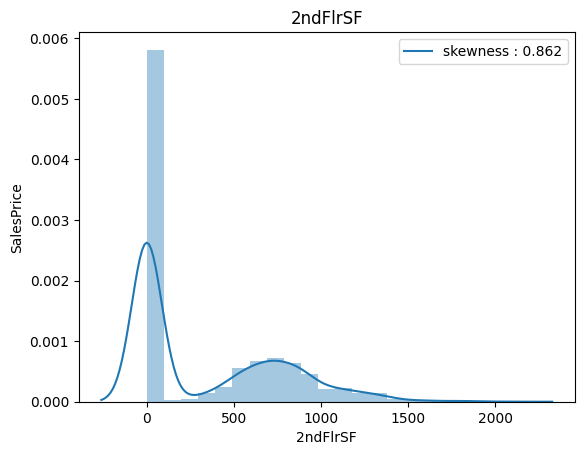

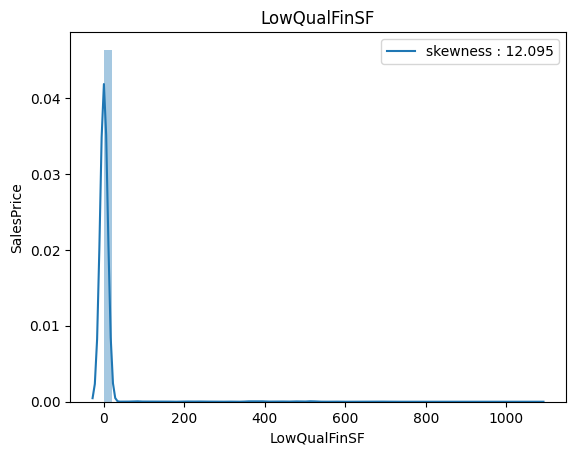

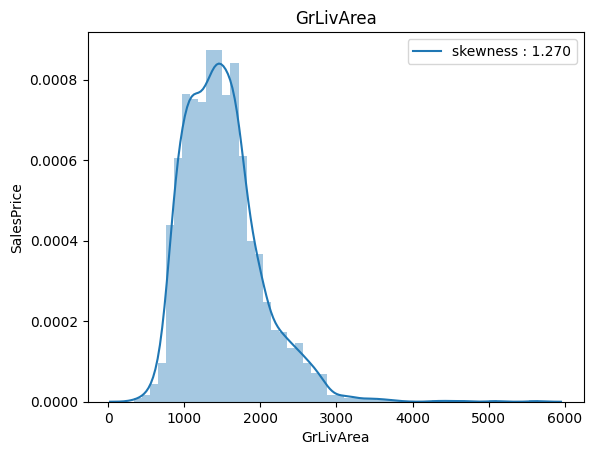

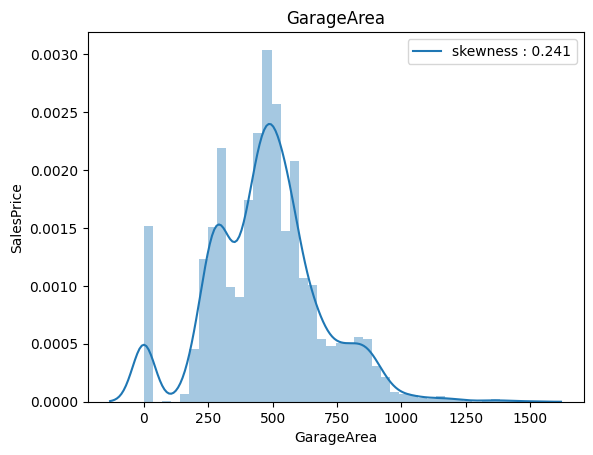

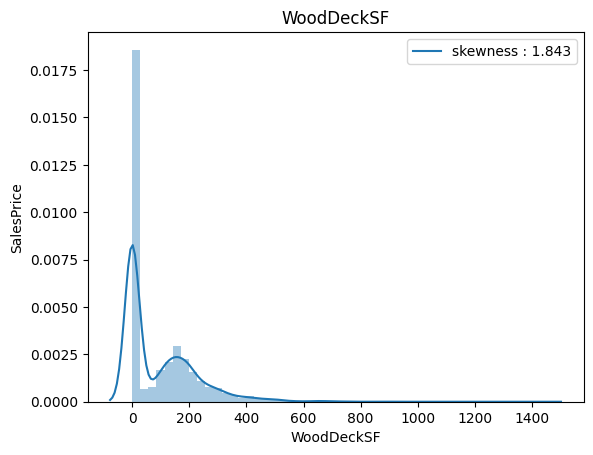

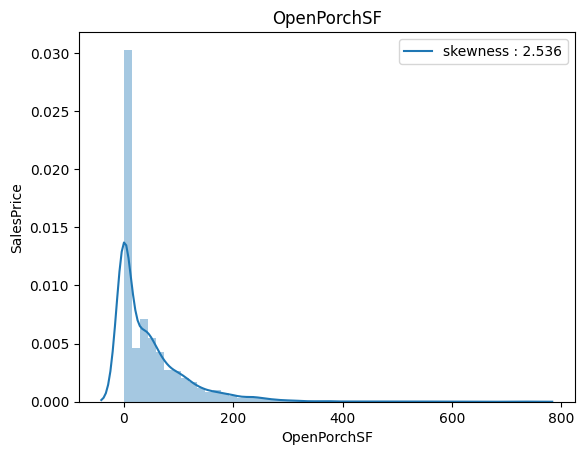

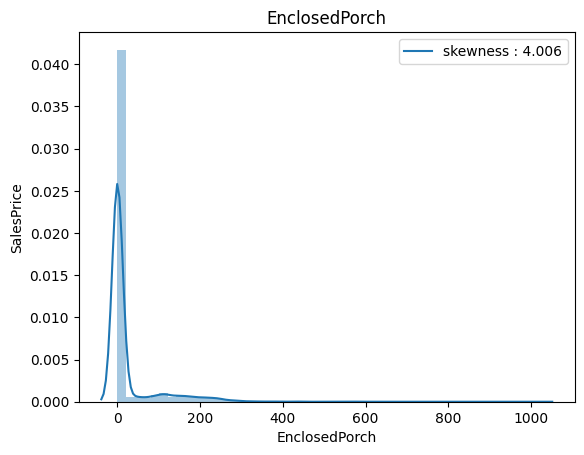

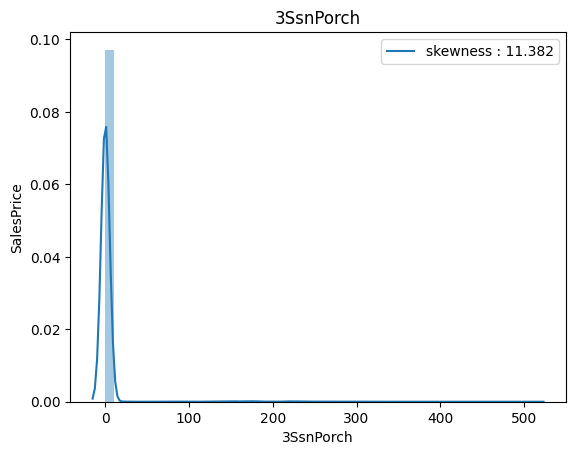

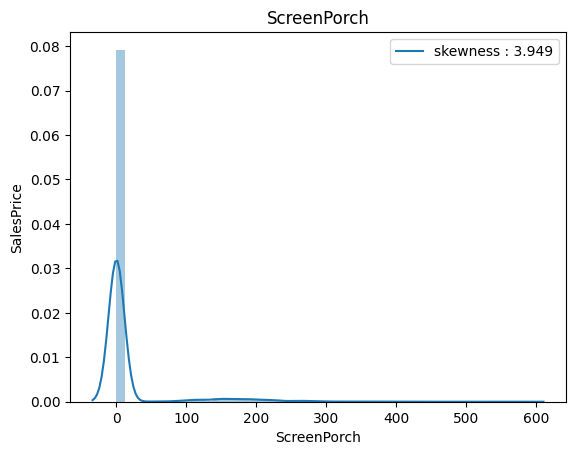

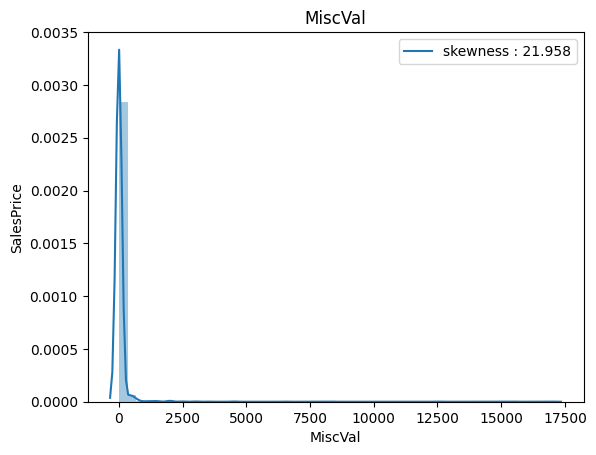

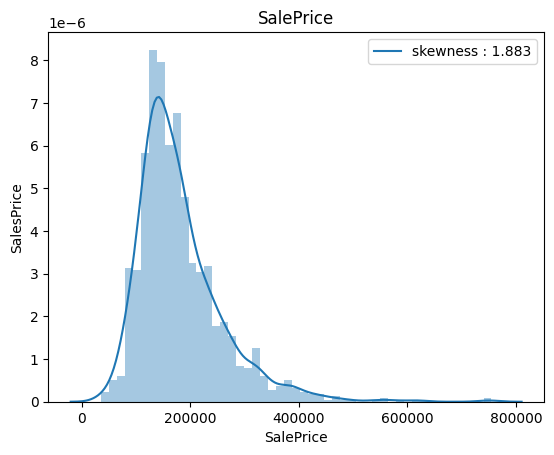

In [ ]:
## We will be using logarithmic transformation
for feature in continious:
    data = df_train.copy()
    #data[feature]=np.log1p(data[feature])
    ax = sns.distplot(data[feature])
    ax.legend(["skewness : {:0.3f}".format(data[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

In [ ]:
skewed = [feature for feature in continious if data[feature].skew()<1]
skewed

['BsmtUnfSF', '2ndFlrSF', 'GarageArea']

In [ ]:
skewed = []
for feature in continious:
    if abs(df_train[feature].skew())>1:
        skewed.append(feature)
skewed

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [ ]:
for feature in continious:
    if feature == "SalePrice":
        pass
    else:
        df_train[feature] = np.log1p(df_train[feature])

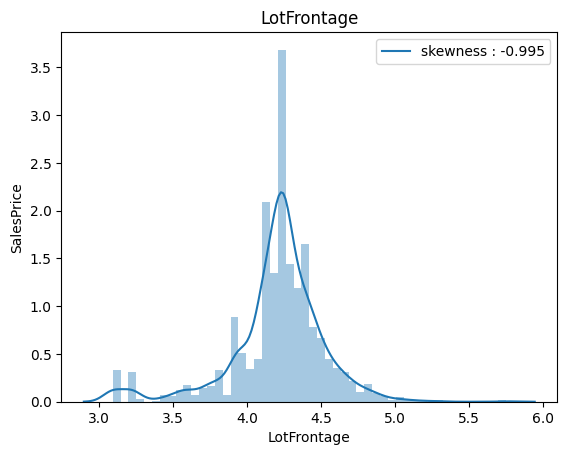

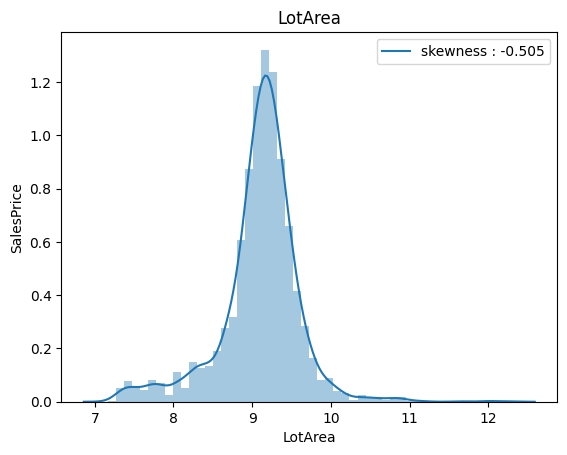

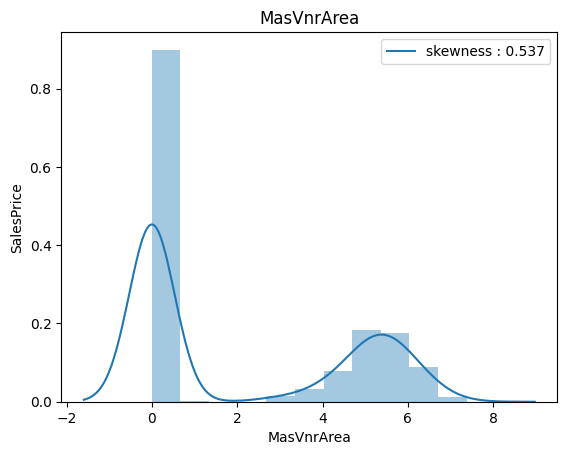

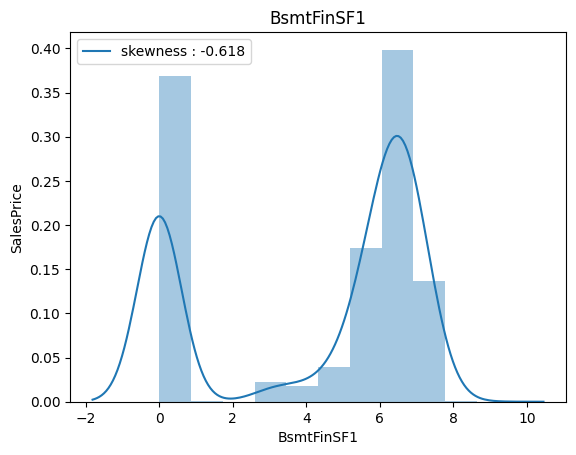

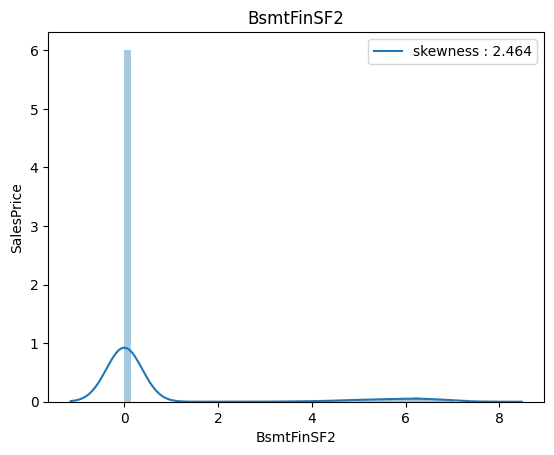

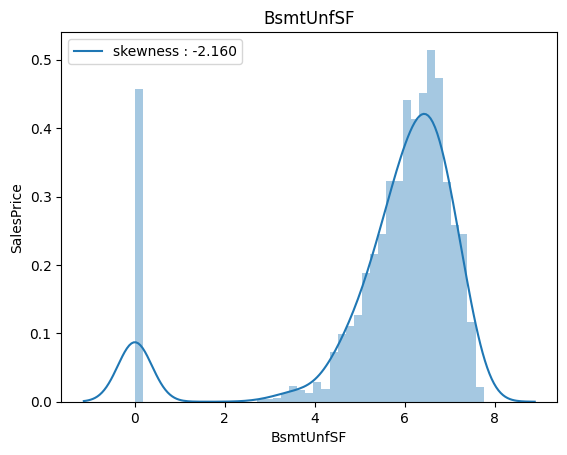

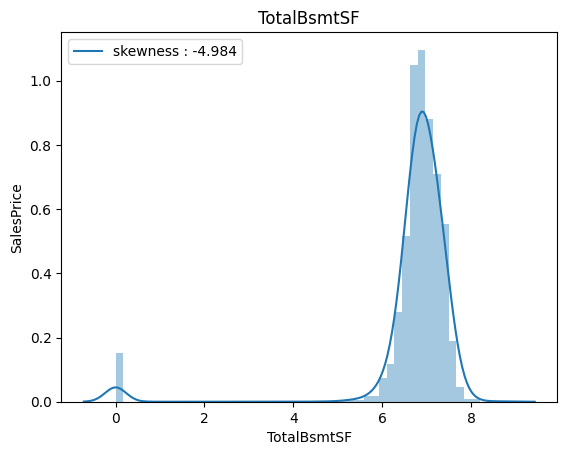

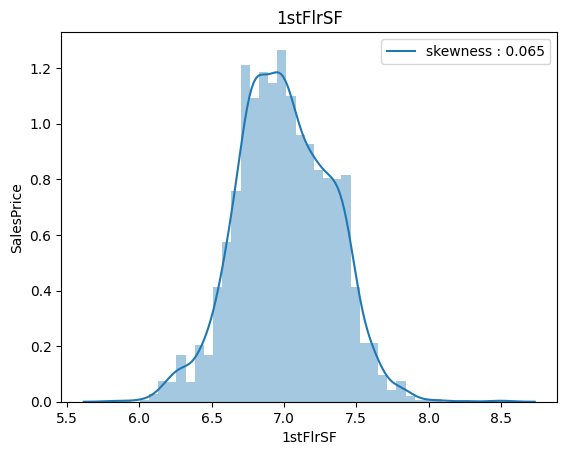

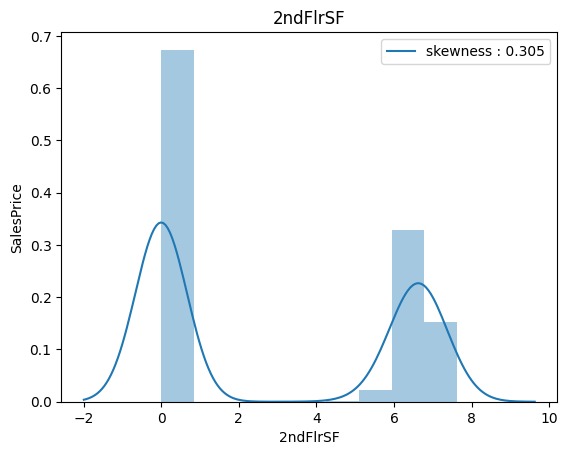

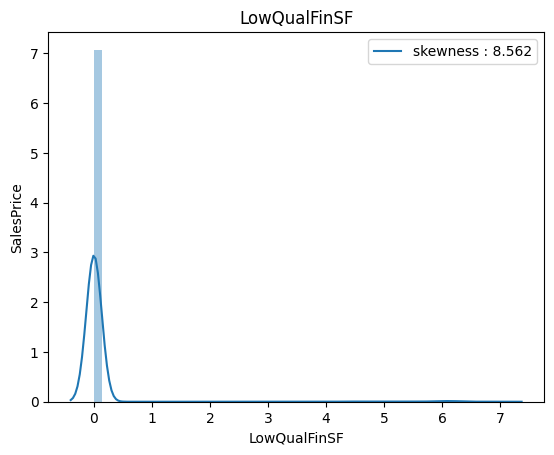

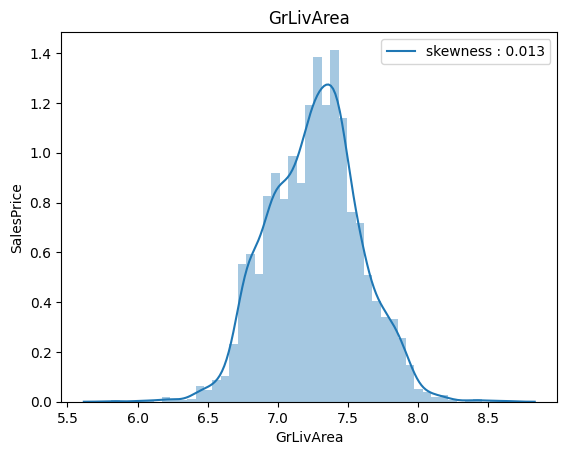

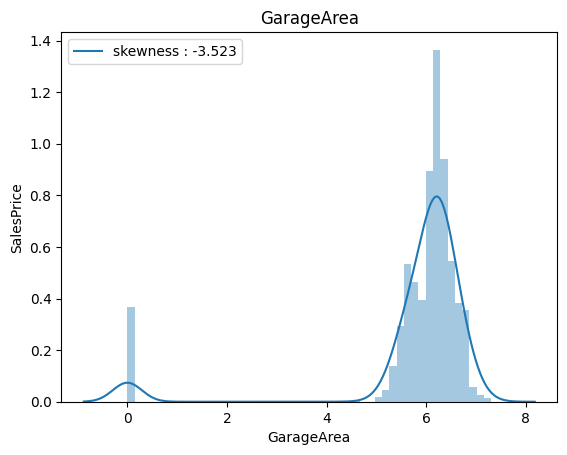

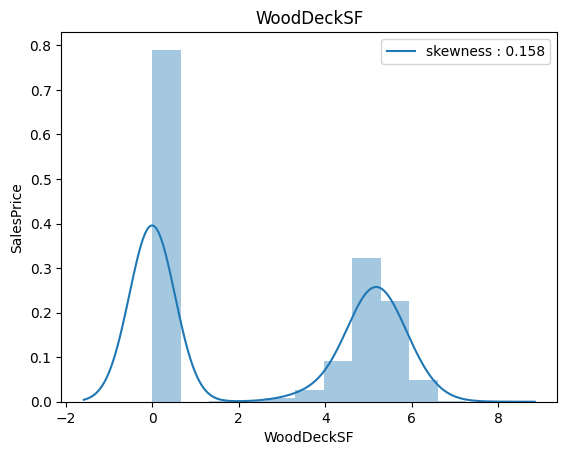

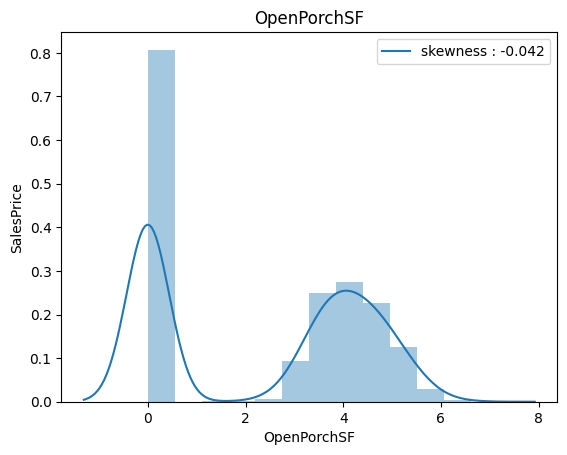

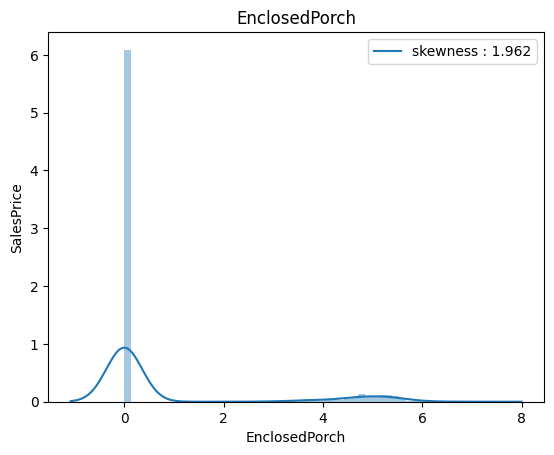

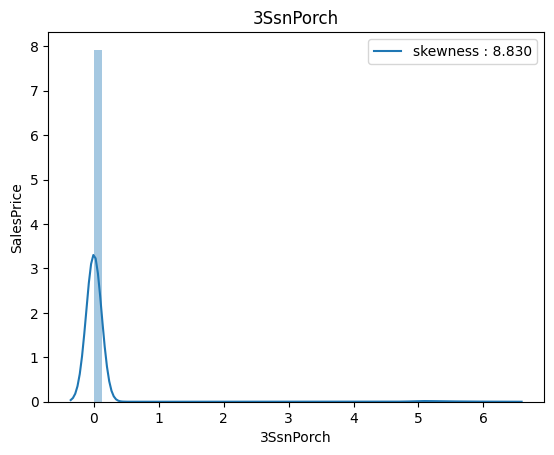

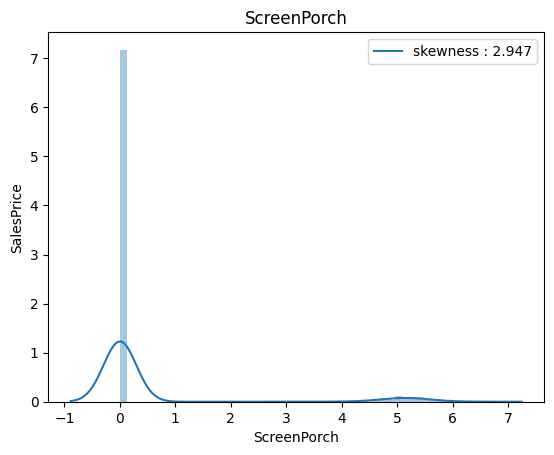

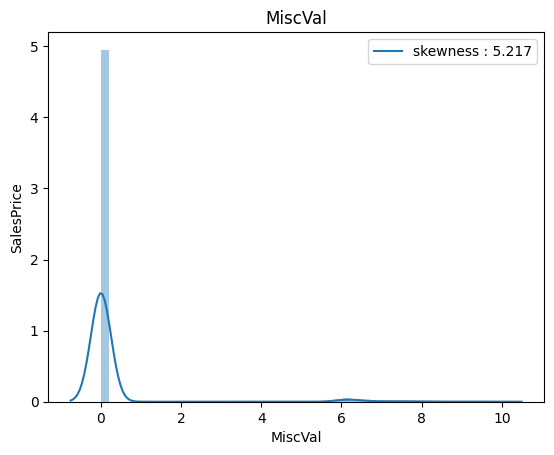

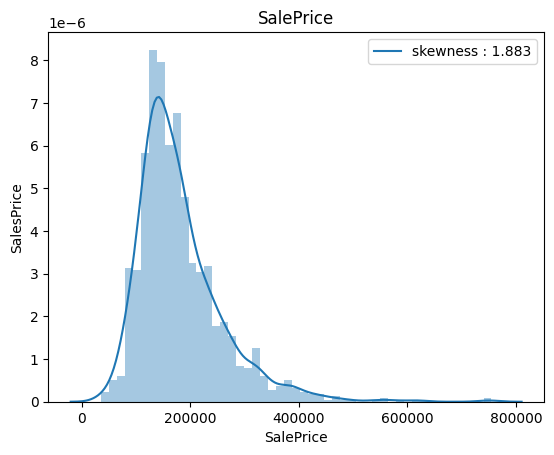

In [ ]:
## We will be using logarithmic transformation
for feature in continious:
    data = df_train.copy()
    #data[feature]=np.log1p(data[feature])
    ax = sns.distplot(data[feature])
    ax.legend(["skewness : {:0.3f}".format(data[feature].skew())])
    plt.xlabel(feature)
    plt.ylabel('SalesPrice')
    plt.title(feature)
    plt.show()

In [ ]:
df_train.shape

(2919, 74)

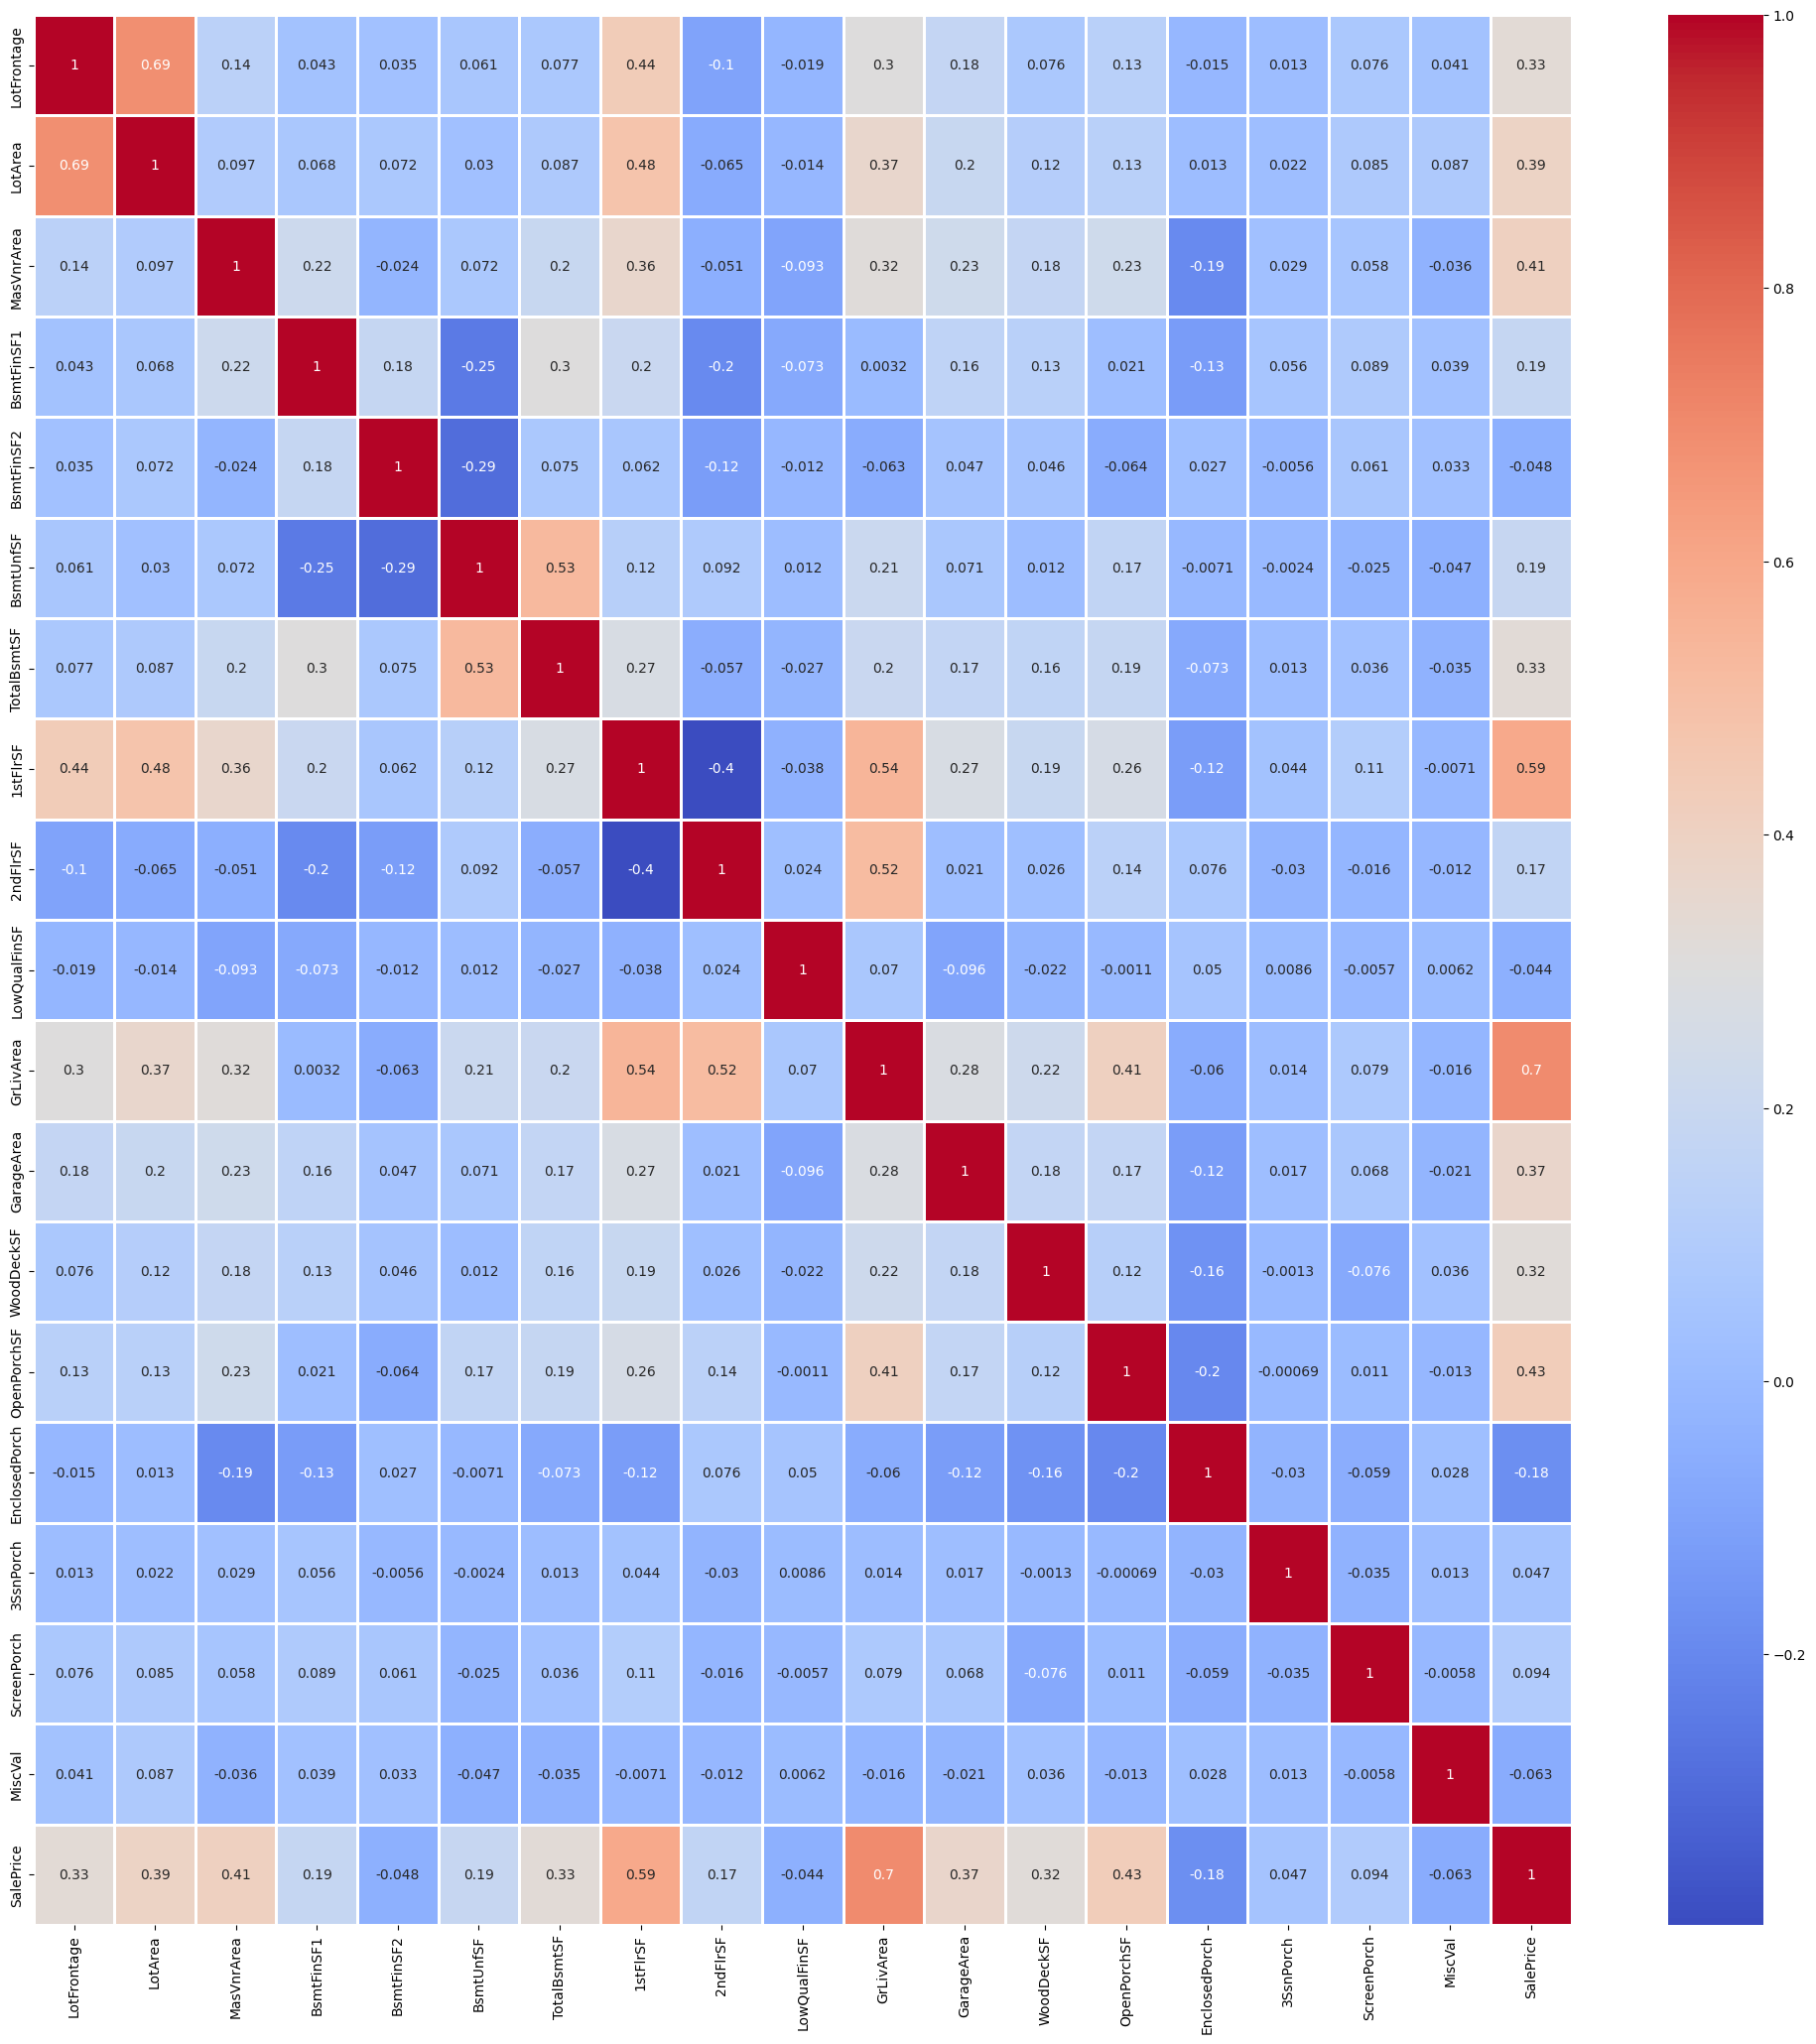

In [ ]:
# correlation heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(df_train[continious].corr(), cmap = "coolwarm", annot=True, linewidth=2)

In [ ]:
# correlation heatmap of higly correlated features with SalePrice
low_corr = df_train[continious].corr()
low_corr_features = low_corr.index[low_corr["SalePrice"] < 0.10]
low_corr_features

Index(['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal'],
      dtype='object')

In [ ]:
df_train.drop(low_corr_features,axis=1,inplace=True)

In [ ]:
df_train.shape

(2919, 68)

## Handling categorical variables

In [ ]:
Categorical = [feature for feature in df_train.columns if df_train[feature].dtype =="O"]
Categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
Categorical = []
for feature in df_train.columns:
  if df_train[feature].dtype=="object":
      Categorical.append(feature)
len(Categorical)

38

In [ ]:
Categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

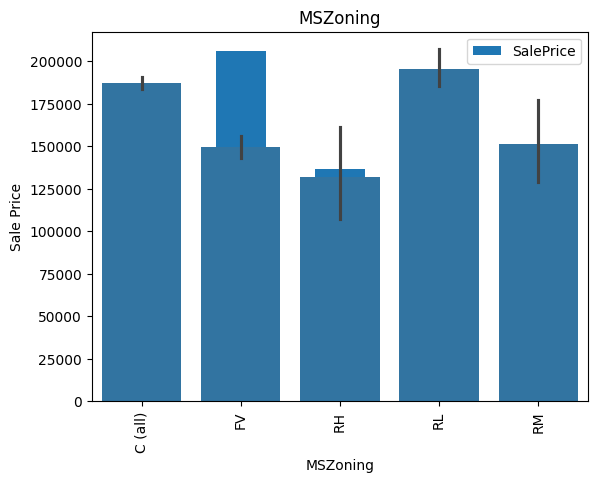

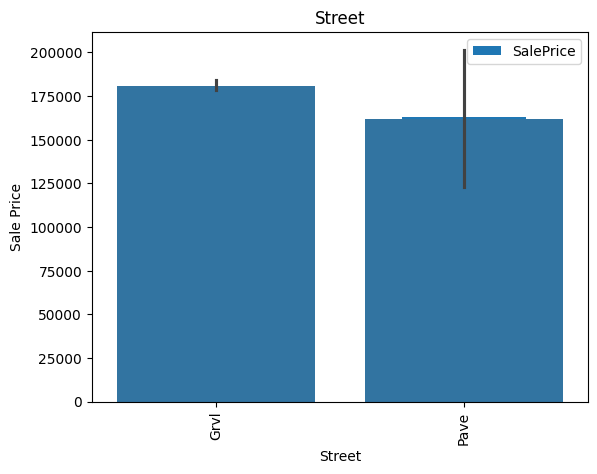

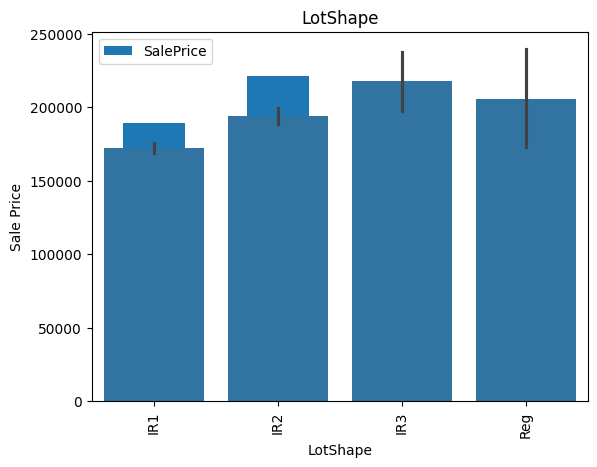

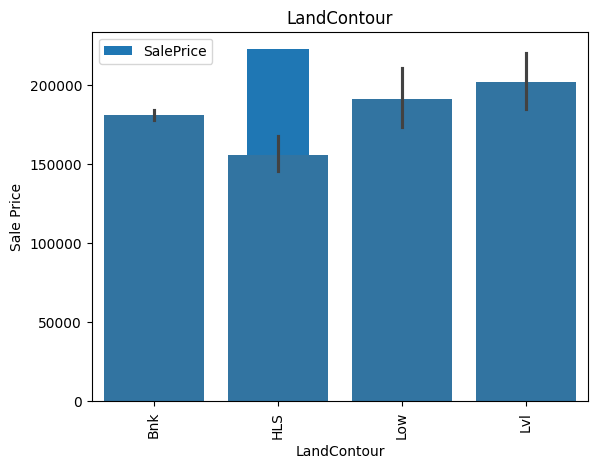

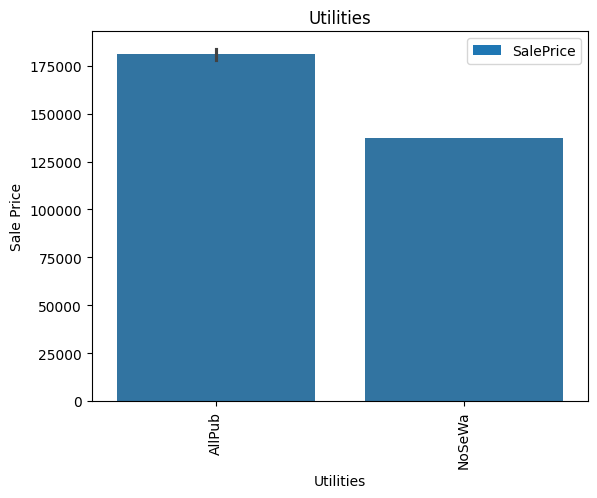

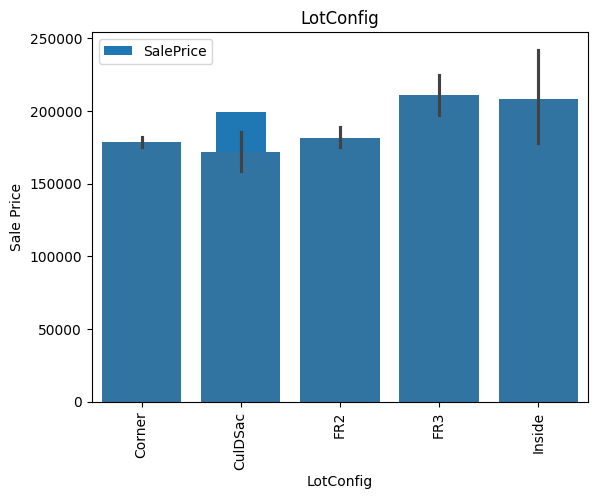

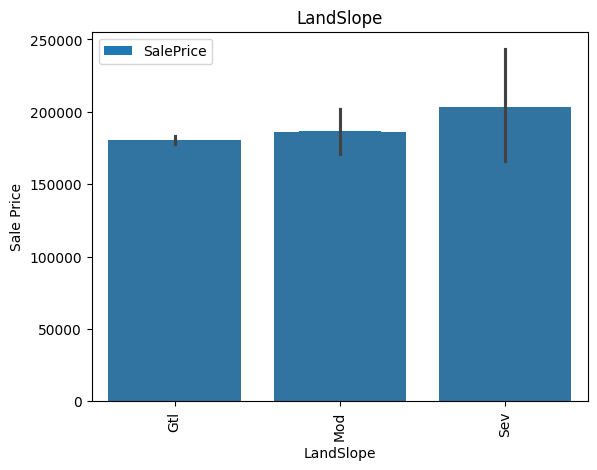

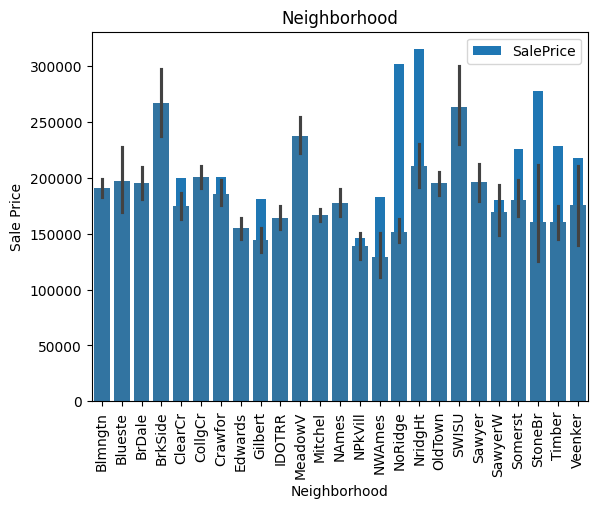

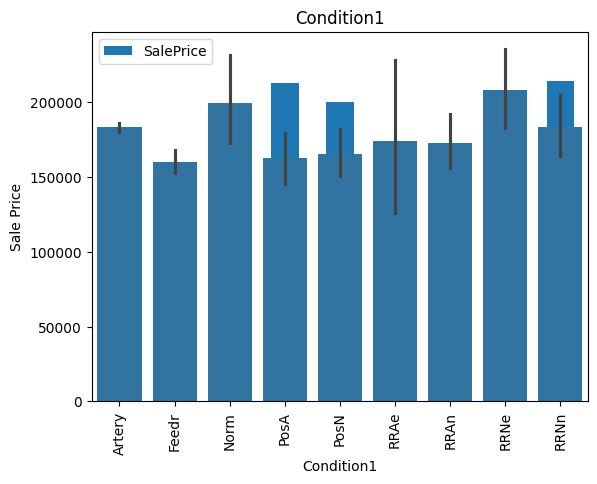

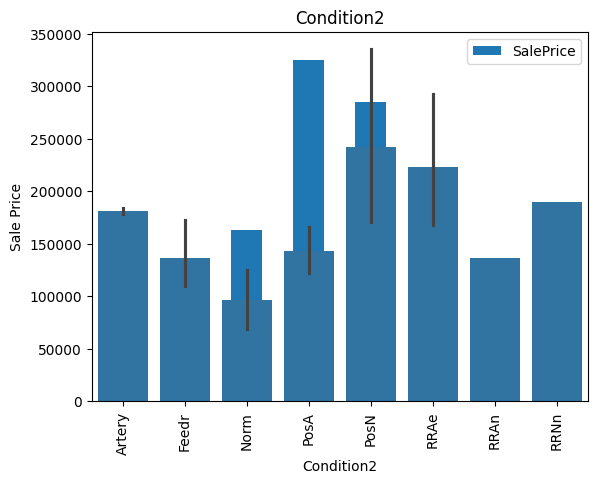

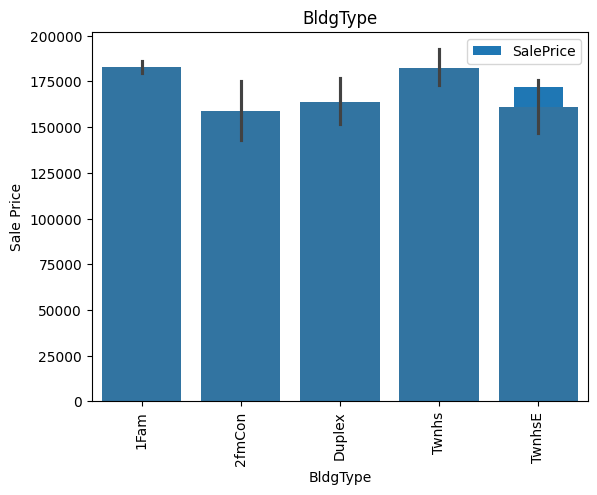

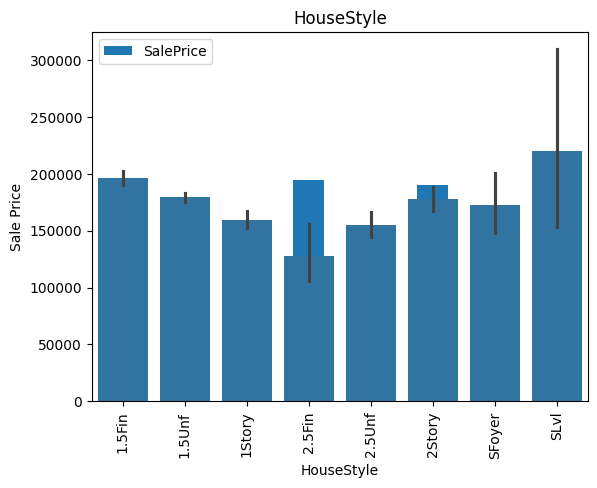

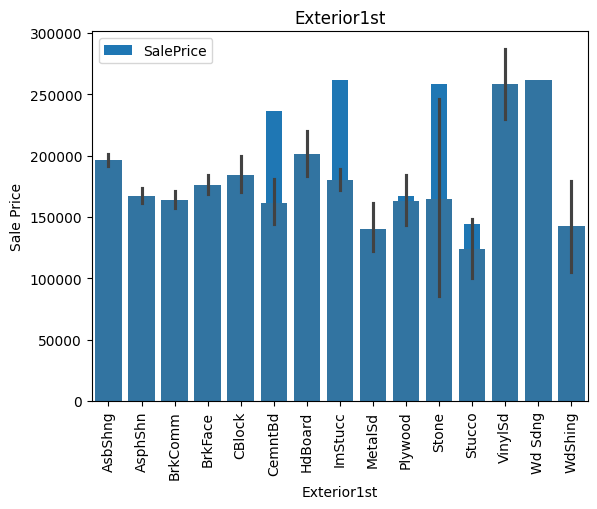

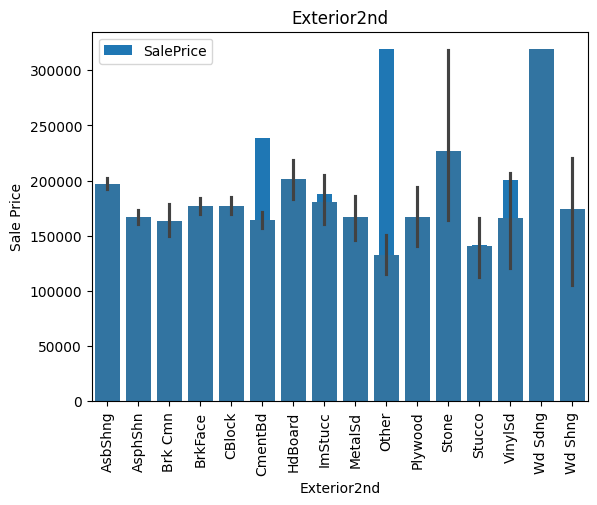

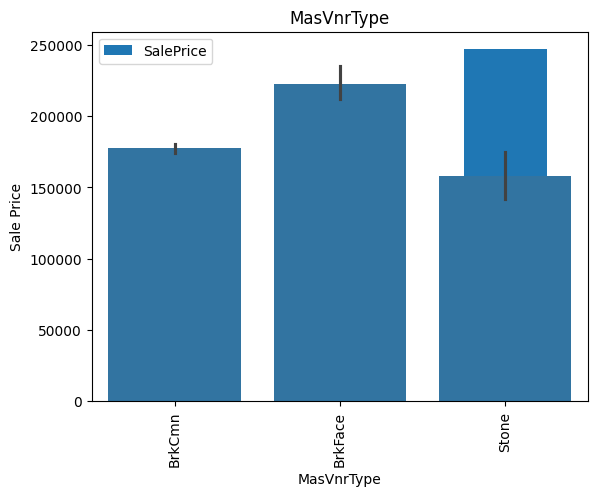

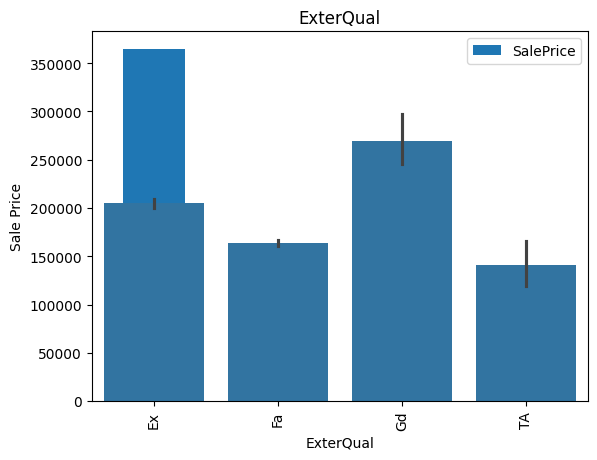

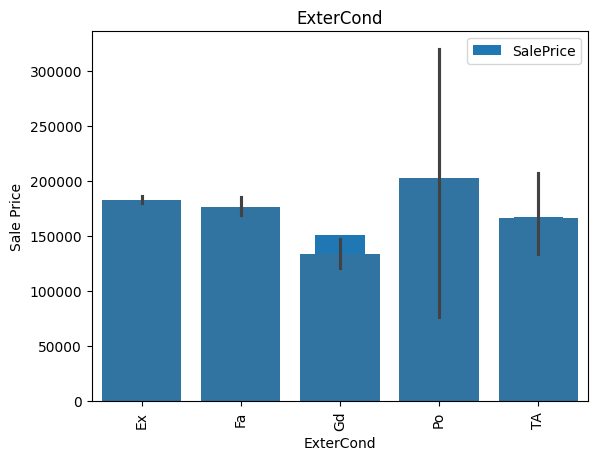

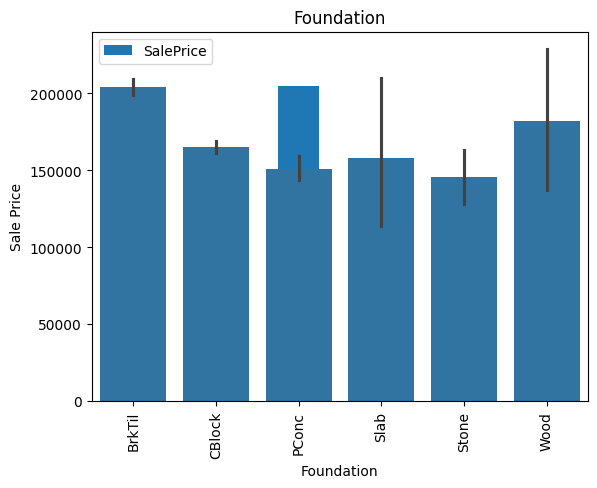

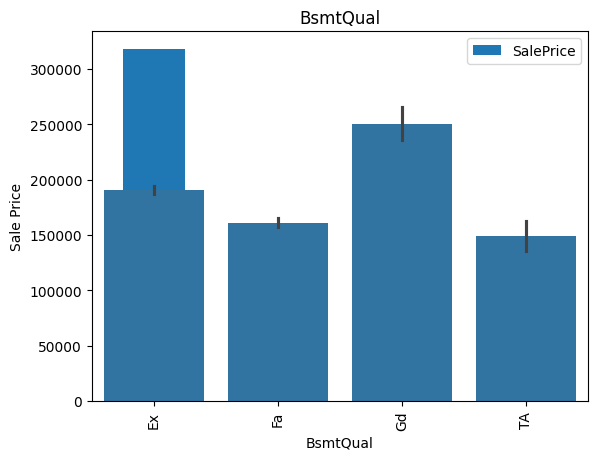

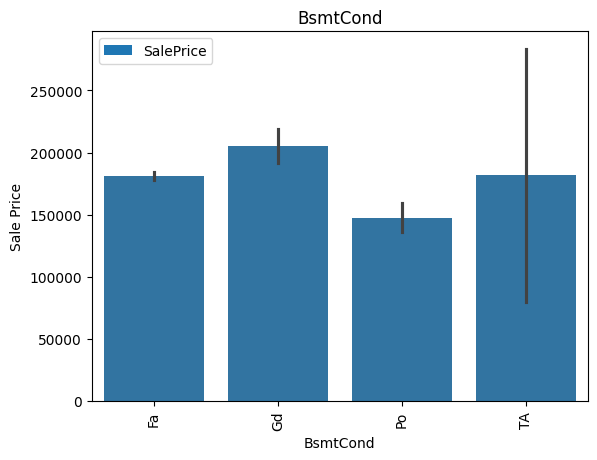

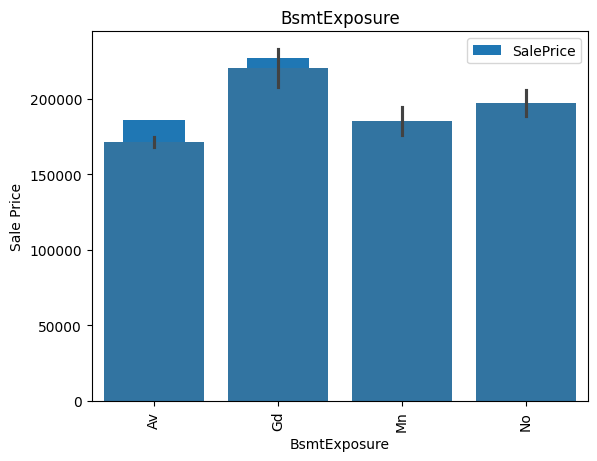

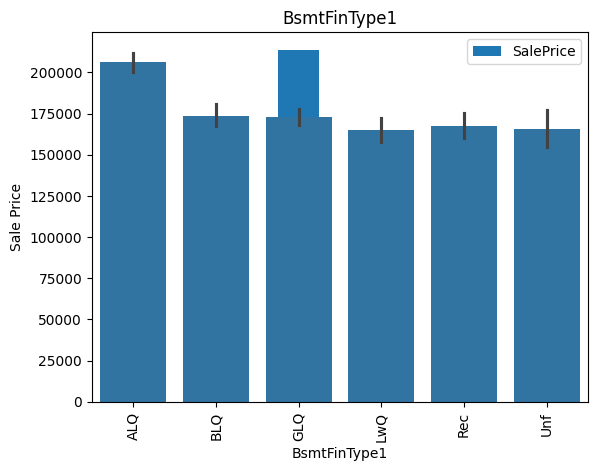

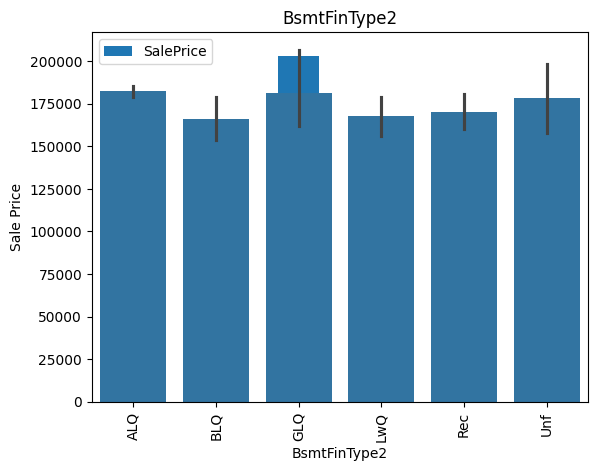

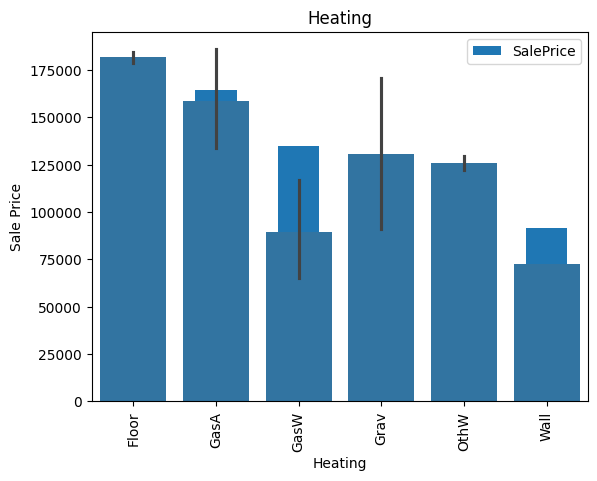

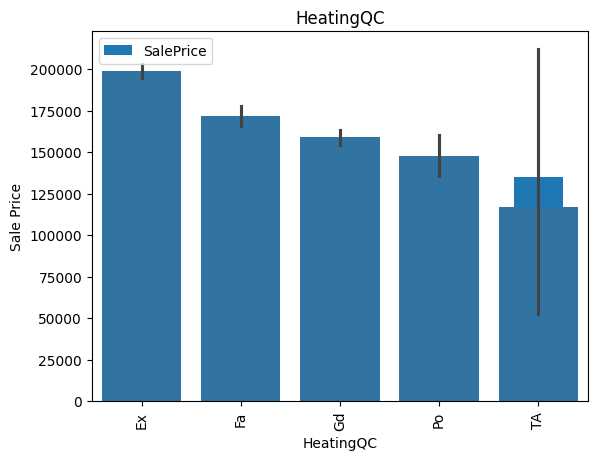

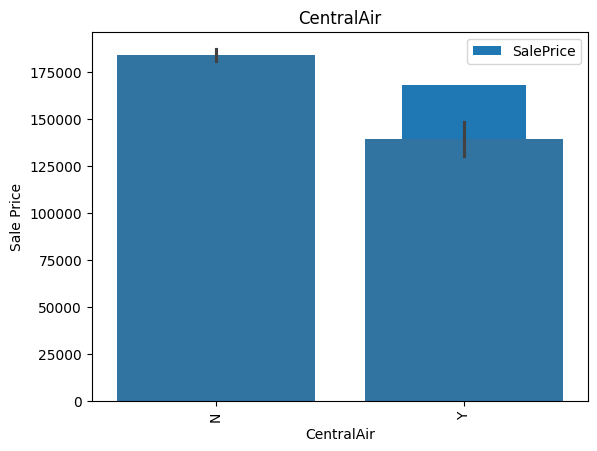

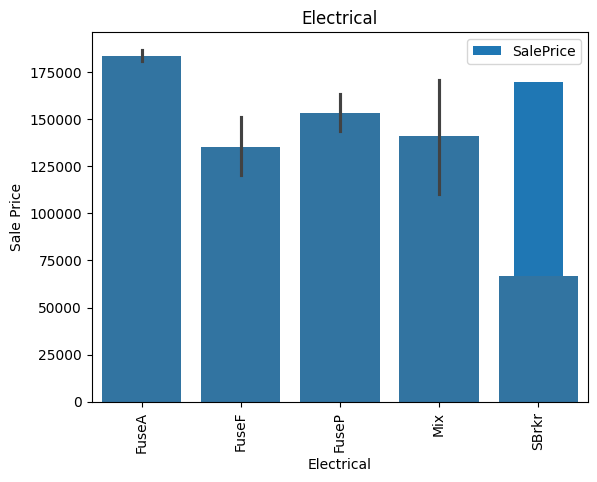

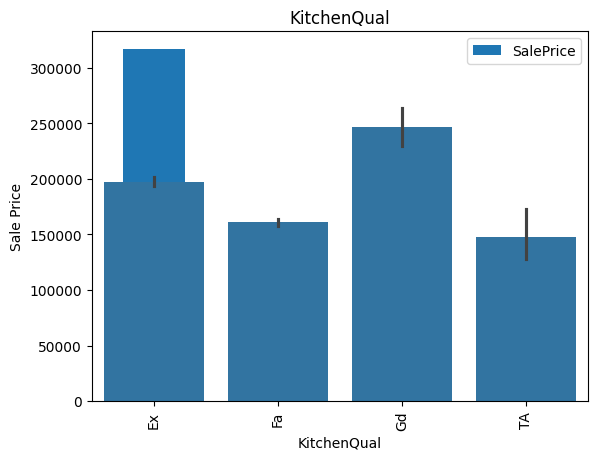

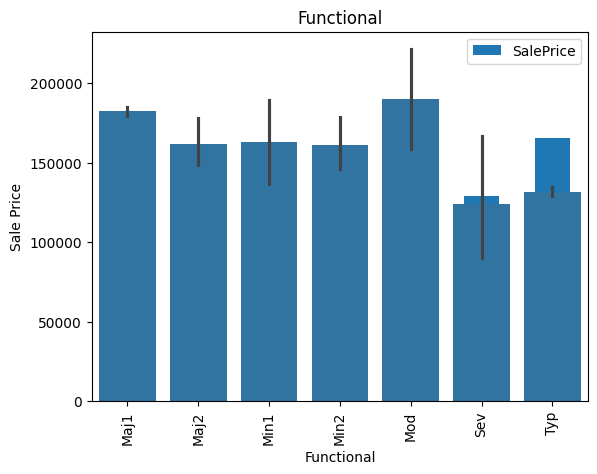

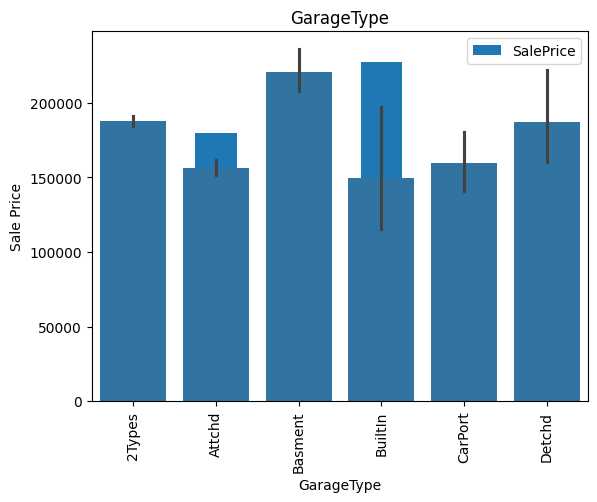

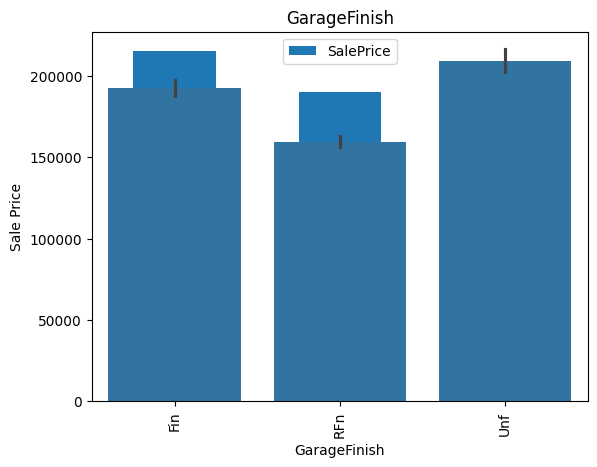

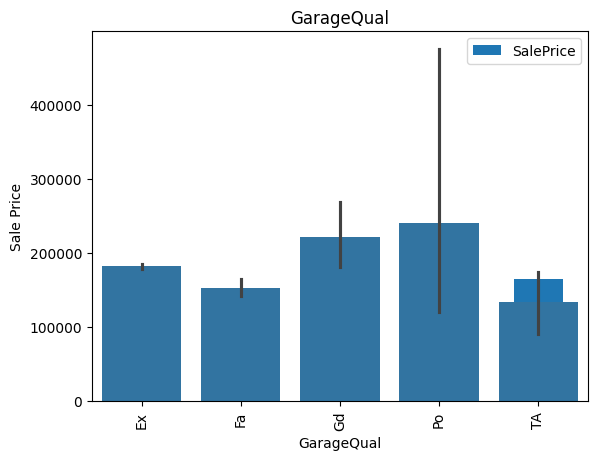

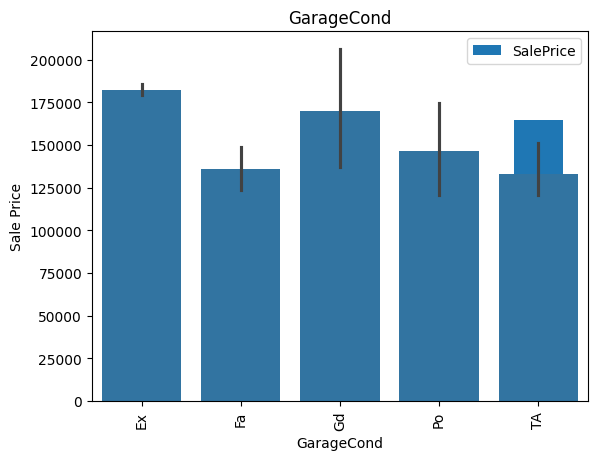

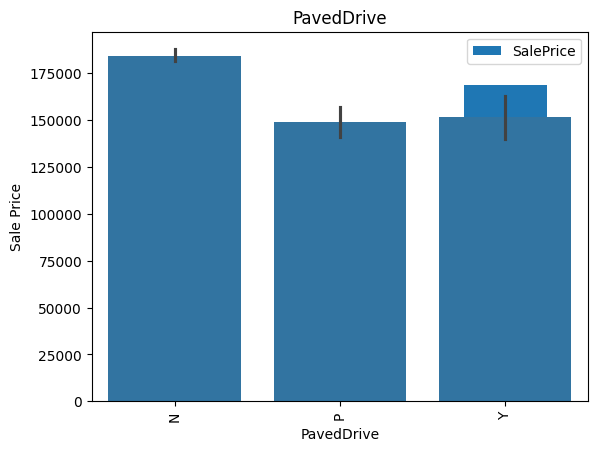

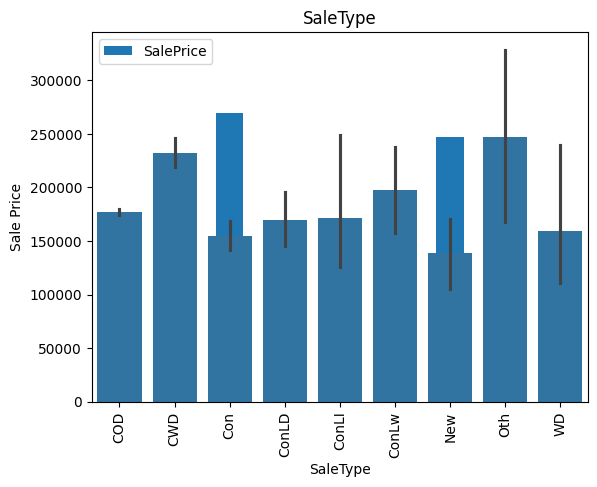

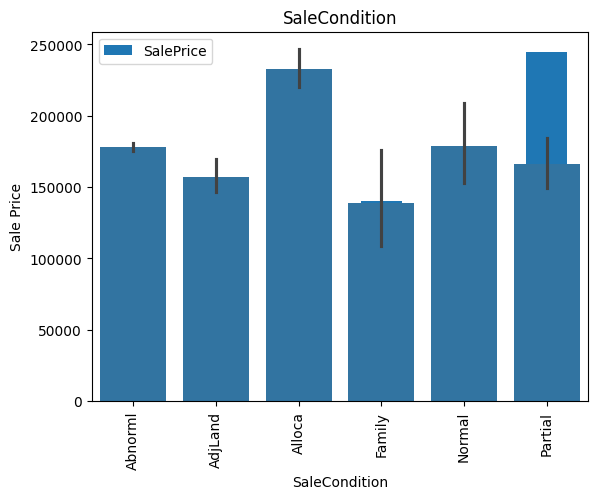

In [ ]:
for feature in Categorical:
  df_train.groupby(feature)["SalePrice"].median().plot.bar()
  sns.barplot(x =df_train[feature], y = df_train["SalePrice"])
  plt.xlabel(feature)
  plt.ylabel("Sale Price")
  plt.title(feature)
  plt.show()

In [ ]:
Categorical

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
from pandas.api.types import CategoricalDtype

# **Ordinal**

In [ ]:
df_train['BsmtCond'].unique()

array(['TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [ ]:
df_train['BsmtCond'].value_counts()

BsmtCond
TA    2688
Gd     122
Fa     104
Po       5
Name: count, dtype: int64

In [ ]:
df_train['BsmtCond']= df_train['BsmtCond'].astype(CategoricalDtype(categories=['TA', 'Gd', 'Fa', 'Po'], ordered=True)).cat.codes


In [ ]:
df_train["BsmtCond"]

0       0
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      2
62      1
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      1
82      0
83      0
84      0
85      0
86      0
87      0
88      2
89      0
90      0
91      0
92      0
93      2
94      0
95      1
96      0
97      0
98      0
99      0


In [ ]:
df_train['BsmtCond'].value_counts()

BsmtCond
0    2688
1     122
2     104
3       5
Name: count, dtype: int64

In [ ]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_train['BsmtQual'] = df_train['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['ExterQual'] = df_train['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['ExterCond'] = df_train['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['Functional'] = df_train['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_train['GarageCond'] = df_train['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['GarageQual'] = df_train['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['GarageFinish'] = df_train['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_train['HeatingQC'] = df_train['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['KitchenQual'] = df_train['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_train['PavedDrive'] = df_train['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_train['Utilities'] = df_train['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [ ]:
ordinal = ["BsmtCond" , "BsmtExposure" , "BsmtFinType1" , "BsmtFinType2" , "BsmtQual" , "ExterQual" , "ExterCond" , "Functional",
          "GarageCond" , "GarageQual" , "GarageFinish" , "HeatingQC" , "KitchenQual" , "PavedDrive" , "Utilities"]

In [ ]:
len(ordinal)

15

In [ ]:
df_train.shape


(2919, 68)

In [ ]:
df_train.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL     4.189655  9.042040   Pave      Reg         Lvl   
1          20       RL     4.394449  9.169623   Pave      Reg         Lvl   
2          60       RL     4.234107  9.328212   Pave      IR1         Lvl   
3          70       RL     4.110874  9.164401   Pave      IR1         Lvl   
4          60       RL     4.442651  9.565284   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0          3    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          3       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2          3    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3          3    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          3       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     VinylSd     VinylSd    BrkFace    5.283204          3   
1  CompShg     MetalSd     MetalSd    BrkFace    0.000000          2   
2  CompShg     VinylSd     VinylSd    BrkFace    5.093750          3   
3  CompShg     Wd Sdng     Wd Shng    BrkFace    0.000000          2   
4  CompShg     VinylSd     VinylSd    BrkFace    5.860786          3   

   ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          2      PConc         4         0            -1             6   
1          2     CBlock         4         0             3             5   
2          2      PConc         4         0             1             6   
3          2     BrkTil         3         1            -1             5   
4          2      PConc         4         0             2             6   

   BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0    6.561031             1   5.017280     6.753438    GasA          4   
1    6.886532             1   5.652489     7.141245    GasA          4   
2    6.188264             1   6.075346     6.825460    GasA          4   
3    5.379897             1   6.293419     6.629363    GasA          3   
4    6.486161             1   6.196444     7.044033    GasA          4   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr  6.753438  6.751101   7.444833           1.0   
1          Y      SBrkr  7.141245  0.000000   7.141245           0.0   
2          Y      SBrkr  6.825460  6.765039   7.488294           1.0   
3          Y      SBrkr  6.869014  6.629363   7.448916           1.0   
4          Y      SBrkr  7.044033  6.960348   7.695758           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3             1            3   
1           1.0         2         0             3             1            2   
2           0.0         2         1             3             1            3   
3           0.0         1         0             3             1            3   
4           0.0         2         1             4             1            3   

   TotRmsAbvGrd  Functional  Fireplaces GarageType  GarageYrBlt  GarageFinish  \
0             8           7           0     Attchd          5.0             2   
1             6           7           1     Attchd         31.0             2   
2             6           7           1     Attchd          7.0             2   
3             7           7  

# **Nominal**

# **One Hot Encoding Technique**

In [ ]:
nominal = [feature for feature in Categorical if feature not in ordinal]

In [ ]:
nominal

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [ ]:
len(nominal)

23

In [ ]:
nominal = []
for feature in Categorical:
  if feature not in ordinal:
    nominal.append(feature)
len(nominal)

23

In [ ]:
for feature in nominal:
  print(feature ,len(df_train[feature].unique()))

MSZoning 5
Street 2
LotShape 4
LandContour 4
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 3
Foundation 6
Heating 6
CentralAir 2
Electrical 5
GarageType 6
SaleType 9
SaleCondition 6


In [ ]:
new_nominal=["Neighborhood","Exterior1st","Exterior2nd"]
new_nominal

['Neighborhood', 'Exterior1st', 'Exterior2nd']

In [ ]:
Nominal_1 = []
for feature in nominal:
  if feature not in new_nominal:
    Nominal_1.append(feature)
len(Nominal_1)

20

In [ ]:
Nominal_variable = pd.get_dummies(df_train[Nominal_1], drop_first=True)
#Nominal_variable.drop(new_nominal, inplace = True)

In [ ]:
Nominal_variable.shape

(2919, 90)

In [ ]:
Nominal_variable = Nominal_variable.astype(int)

In [ ]:
Nominal_variable.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  \
0                 1              0              0                 0   
1                 0              0              0                 1   
2                 1              0              0                 0   
3                 0              0              0                 0   
4                 0              0              0                 0   

   Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
0                1                0                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  \
0               0                0                  0                  0   
1               0                0                  0                  1   
2               0                0                  0                  0   
3               0                0                  0                  0   
4               0                0                  0                  0   

   HouseStyle_2.5Fin  

In [ ]:
df_train['Neighborhood'].value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64

In [ ]:
def top_ten(feature):
  top_ten = []
  for x in feature.value_counts().sort_values(ascending=False).head(10).index:
    top_ten.append(x)
  return top_ten

In [ ]:
top_ten(df_train["Neighborhood"])

['NAmes',
 'CollgCr',
 'OldTown',
 'Edwards',
 'Somerst',
 'NridgHt',
 'Gilbert',
 'Sawyer',
 'NWAmes',
 'SawyerW']

In [ ]:
top_10_Neighborhood=top_ten(df_train["Neighborhood"])
top_10_Exterior1st=top_ten(df_train["Exterior1st"])
top_10_Exterior2nd =top_ten(df_train["Exterior2nd"])




In [ ]:
for i in top_10_Neighborhood:
  df_train[i]=np.where(df_train["Neighborhood"]==i,1,0)
for lable in top_10_Exterior1st:
  df_train[i]=np.where(df_train["Exterior1st"]==lable,1,0)
for a in top_10_Exterior2nd:
  df_train[i]=np.where(df_train["Exterior2nd"]==a,1,0)


In [ ]:
df_train[top_10_Neighborhood].head()

NAmes  CollgCr  OldTown  Edwards  Somerst  NridgHt  Gilbert  Sawyer  \
0      0        1        0        0        0        0        0       0   
1      0        0        0        0        0        0        0       0   
2      0        1        0        0        0        0        0       0   
3      0        0        0        0        0        0        0       0   
4      0        0        0        0        0        0        0       0   

   NWAmes  SawyerW  
0       0        0  
1       0        0  
2       0        0  
3       0        0  
4       0        0

In [ ]:
df_train.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL     4.189655  9.042040   Pave      Reg         Lvl   
1          20       RL     4.394449  9.169623   Pave      Reg         Lvl   
2          60       RL     4.234107  9.328212   Pave      IR1         Lvl   
3          70       RL     4.110874  9.164401   Pave      IR1         Lvl   
4          60       RL     4.442651  9.565284   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0          3    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          3       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2          3    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3          3    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          3       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5          5             5     Gable   
1     1Story            6            8         31            31     Gable   
2     2Story            7            5          7             6     Gable   
3     2Story            7            5         91            36     Gable   
4     2Story            8            5          8             8     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual  \
0  CompShg     VinylSd     VinylSd    BrkFace    5.283204          3   
1  CompShg     MetalSd     MetalSd    BrkFace    0.000000          2   
2  CompShg     VinylSd     VinylSd    BrkFace    5.093750          3   
3  CompShg     Wd Sdng     Wd Shng    BrkFace    0.000000          2   
4  CompShg     VinylSd     VinylSd    BrkFace    5.860786          3   

   ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          2      PConc         4         0            -1             6   
1          2     CBlock         4         0             3             5   
2          2      PConc         4         0             1             6   
3          2     BrkTil         3         1            -1             5   
4          2      PConc         4         0             2             6   

   BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating  HeatingQC  \
0    6.561031             1   5.017280     6.753438    GasA          4   
1    6.886532             1   5.652489     7.141245    GasA          4   
2    6.188264             1   6.075346     6.825460    GasA          4   
3    5.379897             1   6.293419     6.629363    GasA          3   
4    6.486161             1   6.196444     7.044033    GasA          4   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          Y      SBrkr  6.753438  6.751101   7.444833           1.0   
1          Y      SBrkr  7.141245  0.000000   7.141245           0.0   
2          Y      SBrkr  6.825460  6.765039   7.488294           1.0   
3          Y      SBrkr  6.869014  6.629363   7.448916           1.0   
4          Y      SBrkr  7.044033  6.960348   7.695758           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3             1            3   
1           1.0         2         0             3             1            2   
2           0.0         2         1             3             1            3   
3           0.0         1         0             3             1            3   
4           0.0         2         1             4             1            3   

   TotRmsAbvGrd  Functional  Fireplaces GarageType  GarageYrBlt  GarageFinish  \
0             8           7           0     Attchd          5.0             2   
1             6           7           1     Attchd         31.0             2   
2             6           7           1     Attchd          7.0             2   
3             7           7  

In [ ]:
len(nominal)

23

In [ ]:
df_train.shape

(2919, 78)

In [ ]:
df_train.drop(nominal,axis=1,inplace=True)


In [ ]:
df_train.head()

MSSubClass  LotFrontage   LotArea  Utilities  OverallQual  OverallCond  \
0          60     4.189655  9.042040          3            7            5   
1          20     4.394449  9.169623          3            6            8   
2          60     4.234107  9.328212          3            7            5   
3          70     4.110874  9.164401          3            7            5   
4          60     4.442651  9.565284          3            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
0          5             5    5.283204          3          2         4   
1         31            31    0.000000          2          2         4   
2          7             6    5.093750          3          2         4   
3         91            36    0.000000          2          2         3   
4          8             8    5.860786          3          2         4   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  \
0         0            -1             6    6.561031             1   5.017280   
1         0             3             5    6.886532             1   5.652489   
2         0             1             6    6.188264             1   6.075346   
3         1            -1             5    5.379897             1   6.293419   
4         0             2             6    6.486161             1   6.196444   

   TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  \
0     6.753438          4  6.753438  6.751101   7.444833           1.0   
1     7.141245          4  7.141245  0.000000   7.141245           0.0   
2     6.825460          4  6.825460  6.765039   7.488294           1.0   
3     6.629363          3  6.869014  6.629363   7.448916           1.0   
4     7.044033          4  7.044033  6.960348   7.695758           1.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0           0.0         2         1             3             1            3   
1           1.0         2         0             3             1            2   
2           0.0         2         1             3             1            3   
3           0.0         1         0             3             1            3   
4           0.0         2         1             4             1            3   

   TotRmsAbvGrd  Functional  Fireplaces  GarageYrBlt  GarageFinish  \
0             8           7           0          5.0             2   
1             6           7           1         31.0             2   
2             6           7           1          7.0             2   
3             7           7           1          8.0             1   
4             9           7           1          8.0             2   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0         2.0    6.308098           3           3           2    0.000000   
1         2.0    6.133398           3           3           2    5.700444   
2         2.0    6.411818           3           3           2    0.000000   
3         3.0    6.466145           3           3           2    0.000000   
4         3.0    6.729824           3           3           2    5.262690   

   OpenPorchSF  PoolArea  MoSold  SalePrice  NAmes  CollgCr  OldTown  Edwards  \
0     4.127134         0       2   208500.0      0        1        0        0   
1     0.000000         0       5   181500.0      0        0        0        0   
2     3.761200         0       9   223500.0      0        1        0        0   
3     3.583519         0       2   140000.0      0        0        0        0   
4     4.442651         0      12   250000.0      0        0        0        0   

   Somerst  NridgHt  Gilbert  Sawyer  NWAmes  SawyerW  
0        0        0        0       0       0        0  
1        0        0        0       0       0        0  
2        0        0        0       0       0        0  
3        0        0        0       0       0        0  
4        0        0        0       0 

In [ ]:
df_train.shape

(2919, 55)

In [ ]:
train=pd.concat([Nominal_variable,df_train],axis=1)

In [ ]:
train.shape

(2919, 145)

In [ ]:
train.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  \
0                 1              0              0                 0   
1                 0              0              0                 1   
2                 1              0              0                 0   
3                 0              0              0                 0   
4                 0              0              0                 0   

   Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
0                1                0                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  \
0               0                0                  0                  0   
1               0                0                  0                  1   
2               0                0                  0                  0   
3               0                0                  0                  0   
4               0                0                  0                  0   

   HouseStyle_2.5Fin  

In [ ]:
train.columns.duplicated().sum()

0

In [ ]:
train.isnull().sum()

MSZoning_FV                 0
MSZoning_RH                 0
MSZoning_RL                 0
MSZoning_RM                 0
Street_Pave                 0
LotShape_IR2                0
LotShape_IR3                0
LotShape_Reg                0
LandContour_HLS             0
LandContour_Low             0
LandContour_Lvl             0
LotConfig_CulDSac           0
LotConfig_FR2               0
LotConfig_FR3               0
LotConfig_Inside            0
LandSlope_Mod               0
LandSlope_Sev               0
Condition1_Feedr            0
Condition1_Norm             0
Condition1_PosA             0
Condition1_PosN             0
Condition1_RRAe             0
Condition1_RRAn             0
Condition1_RRNe             0
Condition1_RRNn             0
Condition2_Feedr            0
Condition2_Norm             0
Condition2_PosA             0
Condition2_PosN             0
Condition2_RRAe             0
Condition2_RRAn             0
Condition2_RRNn             0
BldgType_2fmCon             0
BldgType_D

# **Spilit The Dataset Into Train And Test**

In [ ]:
train_df = train.iloc[:1460,:]
df_test = train.iloc[1460:,:]

In [ ]:
print(train_df.shape)
print(df_test.shape)


(1460, 145)
(1459, 145)


In [ ]:
df_test["SalePrice"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     NaN
33     NaN
34     NaN
35     NaN
36     NaN
37     NaN
38     NaN
39     NaN
40     NaN
41     NaN
42     NaN
43     NaN
44     NaN
45     NaN
46     NaN
47     NaN
48     NaN
49     NaN
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
56     NaN
57     NaN
58     NaN
59     NaN
60     NaN
61     NaN
62     NaN
63     NaN
64     NaN
65     NaN
66     NaN
67     NaN
68     NaN
69     NaN
70     NaN
71     NaN
72     NaN
73     NaN
74     NaN
75     NaN
76     NaN
77     NaN
78     NaN
79     NaN
80     NaN
81     NaN
82     NaN
83     NaN
84     NaN
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
90     NaN

In [ ]:
test = df_test.drop("SalePrice" , axis = 1)
test.shape

(1459, 144)

In [ ]:
X=train_df.drop("SalePrice",axis=1)
y= train_df["SalePrice"]

In [ ]:
X.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Condition1_Feedr  \
0                 1              0              0                 0   
1                 0              0              0                 1   
2                 1              0              0                 0   
3                 0              0              0                 0   
4                 0              0              0                 0   

   Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  \
0                1                0                0                0   
1                0                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  Condition2_Feedr  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   Condition2_Norm  Condition2_PosA  Condition2_PosN  Condition2_RRAe  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   Condition2_RRAn  Condition2_RRNn  BldgType_2fmCon  BldgType_Duplex  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf  HouseStyle_1Story  \
0               0                0                  0                  0   
1               0                0                  0                  1   
2               0                0                  0                  0   
3               0                0                  0                  0   
4               0                0                  0                  0   

   HouseStyle_2.5Fin  

In [ ]:
X.shape

(1460, 144)

In [ ]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

# **Feature Selection**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[2.18510867e-04 5.76659700e-05 3.08004120e-03 3.72675640e-03
 5.85395378e-05 2.04639800e-03 3.37344796e-04 2.39956689e-03
 1.12682391e-03 1.80242775e-03 2.45919778e-03 1.63433165e-03
 3.66320930e-04 2.06070334e-05 2.63969288e-03 1.07633908e-03
 6.37172093e-04 3.62732404e-04 1.65223255e-03 2.22146640e-04
 9.25056220e-04 6.74741605e-05 1.21452292e-04 9.29551191e-06
 2.00609334e-05 2.25160139e-05 7.31171940e-04 3.04907910e-06
 5.58131665e-04 3.05443862e-08 1.44510786e-08 6.38306322e-07
 6.60356750e-05 1.72002157e-04 1.34639165e-04 4.88190939e-04
 4.32338415e-05 9.90498681e-04 2.42530444e-04 6.43765023e-05
 2.48009974e-03 4.83477973e-05 2.05548180e-04 1.41157497e-03
 3.89088746e-04 1.49798930e-03 2.71182234e-05 8.01027523e-06
 7.64460751e-04 5.50100483e-05 2.06163891e-05 3.02898782e-07
 7.04412631e-05 2.30246203e-05 8.79202998e-04 1.20483445e-03
 1.03110070e-03 9.58280937e-04 1.03680709e-03 3.77416305e-05
 9.78157265e-06 6.33205776e-05 2.88581397e-04 2.48106354e-04
 3.17558813e-05 4.590539

In [ ]:
X.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low',
       ...
       'NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'NridgHt',
       'Gilbert', 'Sawyer', 'NWAmes', 'SawyerW'],
      dtype='object', length=144)

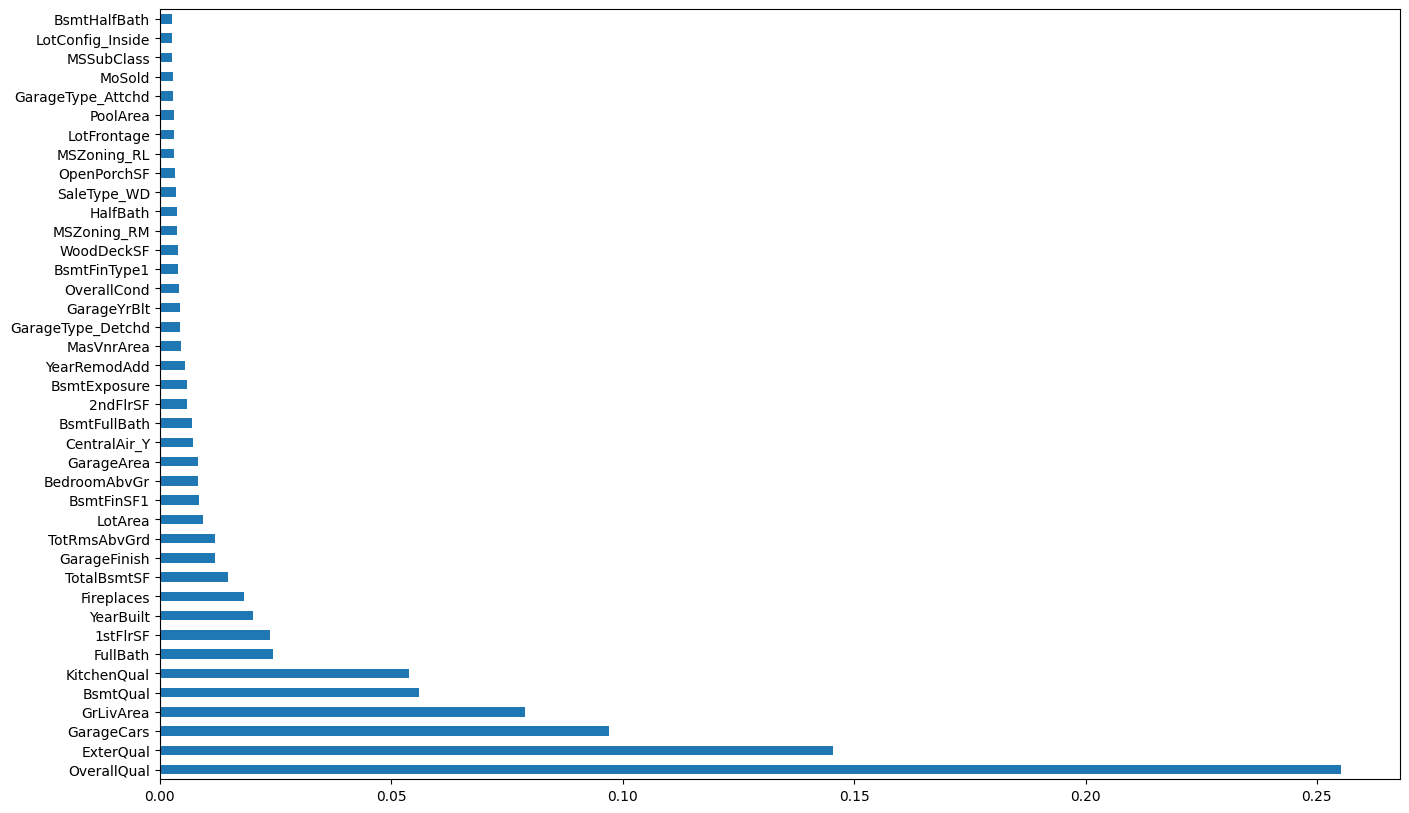

In [ ]:
plt.figure(figsize=(16,10))
ranked_feature = pd.Series(model.feature_importances_,X.columns)
ranked_feature.nlargest(40).plot(kind="barh")
plt.show()

In [ ]:
features = ranked_feature.nlargest(23)
features

OverallQual     0.255160
ExterQual       0.145486
GarageCars      0.096945
GrLivArea       0.078879
BsmtQual        0.056056
KitchenQual     0.053929
FullBath        0.024456
1stFlrSF        0.023854
YearBuilt       0.020125
Fireplaces      0.018191
TotalBsmtSF     0.014797
GarageFinish    0.011984
TotRmsAbvGrd    0.011923
LotArea         0.009350
BsmtFinSF1      0.008508
BedroomAbvGr    0.008224
GarageArea      0.008183
CentralAir_Y    0.007214
BsmtFullBath    0.006954
2ndFlrSF        0.005803
BsmtExposure    0.005790
YearRemodAdd    0.005410
MasVnrArea      0.004540
dtype: float64

In [ ]:
features.index

Index(['OverallQual', 'ExterQual', 'GarageCars', 'GrLivArea', 'BsmtQual',
       'KitchenQual', 'FullBath', '1stFlrSF', 'YearBuilt', 'Fireplaces',
       'TotalBsmtSF', 'GarageFinish', 'TotRmsAbvGrd', 'LotArea', 'BsmtFinSF1',
       'BedroomAbvGr', 'GarageArea', 'CentralAir_Y', 'BsmtFullBath',
       '2ndFlrSF', 'BsmtExposure', 'YearRemodAdd', 'MasVnrArea'],
      dtype='object')

In [ ]:
X = train_df[features.index]

In [ ]:
X.shape


(1460, 23)

In [ ]:
X.head()

OverallQual  ExterQual  GarageCars  GrLivArea  BsmtQual  KitchenQual  \
0            7          3         2.0   7.444833         4            3   
1            6          2         2.0   7.141245         4            2   
2            7          3         2.0   7.488294         4            3   
3            7          2         3.0   7.448916         3            3   
4            8          3         3.0   7.695758         4            3   

   FullBath  1stFlrSF  YearBuilt  Fireplaces  TotalBsmtSF  GarageFinish  \
0         2  6.753438          5           0     6.753438             2   
1         2  7.141245         31           1     7.141245             2   
2         2  6.825460          7           1     6.825460             2   
3         1  6.869014         91           1     6.629363             1   
4         2  7.044033          8           1     7.044033             2   

   TotRmsAbvGrd   LotArea  BsmtFinSF1  BedroomAbvGr  GarageArea  CentralAir_Y  \
0             8  9.042040    6.561031             3    6.308098             1   
1             6  9.169623    6.886532             3    6.133398             1   
2             6  9.328212    6.188264             3    6.411818             1   
3             7  9.164401    5.379897             3    6.466145             1   
4             9  9.565284    6.486161             4    6.729824             1   

   BsmtFullBath  2ndFlrSF  BsmtExposure  YearRemodAdd  MasVnrArea  
0           1.0  6.751101            -1             5    5.283204  
1           0.0  0.000000             3            31    0.000000  
2           1.0  6.765039             1             6    5.093750  
3           1.0  6.629363            -1            36    0.000000  
4           1.0  6.960348             2             8    5.860786

# **Model Building**

In [ ]:
## split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# **Robust Scaller**

In [ ]:
df_test= test[features.index]
df_test.head()

OverallQual  ExterQual  GarageCars  GrLivArea  BsmtQual  KitchenQual  \
0            5          2         1.0   6.799056         3            2   
1            6          2         1.0   7.192934         3            3   
2            5          2         2.0   7.396335         4            2   
3            6          2         2.0   7.380879         3            3   
4            8          3         2.0   7.155396         4            3   

   FullBath  1stFlrSF  YearBuilt  Fireplaces  TotalBsmtSF  GarageFinish  \
0         1  6.799056         49           0     6.783325             1   
1         1  7.192934         52           0     7.192934             1   
2         2  6.834109         13           1     6.834109             3   
3         2  6.831954         12           1     6.831954             3   
4         2  7.155396         18           0     7.155396             2   

   TotRmsAbvGrd   LotArea  BsmtFinSF1  BedroomAbvGr  GarageArea  CentralAir_Y  \
0             5  9.360741    6.150603             2    6.594413             1   
1             6  9.565775    6.828712             3    5.746203             1   
2             6  9.534668    6.674561             3    6.180017             1   
3             7  9.208238    6.401917             3    6.154858             1   
4             5  8.518392    5.575949             2    6.228511             1   

   BsmtFullBath  2ndFlrSF  BsmtExposure  YearRemodAdd  MasVnrArea  
0           0.0  0.000000            -1            49    0.000000  
1           0.0  0.000000            -1            52    4.691348  
2           0.0  6.553933            -1            12    0.000000  
3           0.0  6.520621            -1            12    3.044522  
4           0.0  0.000000            -1            18    0.000000

In [ ]:
df_test.shape

(1459, 23)

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
df_test= scaler.fit_transform(df_test)

In [ ]:
X_train

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.10810811,  1.0484322 ],
       [-0.5       ,  0.        , -1.        , ...,  0.        ,
         1.18918919,  0.        ],
       [-0.5       ,  0.        ,  0.        , ...,  0.        ,
         0.67567568,  1.11981773],
       ...,
       [-1.5       ,  0.        , -1.        , ...,  0.        ,
         1.13513514,  0.        ],
       [-0.5       ,  0.        , -1.        , ...,  0.        ,
         0.83783784,  0.        ],
       [-1.        ,  0.        ,  0.        , ...,  0.        ,
         0.86486486,  0.        ]])

In [ ]:
X_test

array([[ 1.        ,  1.        ,  0.        , ...,  1.        ,
        -0.31372549,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         0.67973856,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.15686275,  1.13770104],
       [-0.5       ,  0.        ,  0.        , ...,  0.        ,
         0.5751634 ,  1.21970838],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.33986928,  0.        ]])

In [ ]:
df_test

array([[-0.5       ,  0.        , -1.        , ...,  0.        ,
         0.825     ,  0.        ],
       [ 0.        ,  0.        , -1.        , ...,  0.        ,
         0.9       ,  0.92100077],
       [-0.5       ,  0.        ,  0.        , ...,  0.        ,
        -0.1       ,  0.        ],
       ...,
       [-0.5       ,  0.        ,  0.        , ...,  0.        ,
        -0.15      ,  0.        ],
       [-0.5       ,  0.        , -2.        , ...,  1.5       ,
        -0.05      ,  0.        ],
       [ 0.5       ,  0.        ,  1.        , ...,  1.5       ,
        -0.1       ,  0.89401261]])

## **Machine Learning Modeling**

### **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score# for calculating mean_squared error,for measering the goodness of best fit line


reg =LinearRegression()
reg.fit(X_train,y_train)


y_pred_train=reg.predict(X_train)
rmse1=np.sqrt(mean_squared_error(y_train,y_pred_train))
train_score=r2_score(y_train,y_pred_train)


y_pred=reg.predict(X_test)
rmse2=np.sqrt(mean_squared_error(y_test,y_pred))
test_score=r2_score(y_test,y_pred)

print(f"Value Of R2_Score For Training Data is {train_score}")
print(f"RMSE Value is {rmse1}")
print("\n")
print(f"Value Of R2_Score For Test Data is {test_score}")
print(f"RMSE Value is {rmse2}")


Value Of R2_Score For Training Data is 0.8134531578983089
RMSE Value is 34172.993301248665


Value Of R2_Score For Test Data is 0.7801932186050156
RMSE Value is 37769.663245223965


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)

prediction = DT.predict(X_test)
score = r2_score(y_test , prediction)

print(score)



0.7677681918965101


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)
score_rf =r2_score(y_test,y_pred_rf)
rmse=np.sqrt(mean_squared_error(y_test,y_pred_rf))

print(f"Value Of R2 Score {score_rf}")
print(f"Value Of RMSE {rmse}")

Value Of R2 Score 0.9161764987117873
Value Of RMSE 23324.130776373087


In [ ]:
from sklearn.model_selection import cross_val_score
cross_validation =cross_val_score(estimator=rf,X=X_train,y=y_train,cv=10,verbose=True)
print("Cross validation accuracy of random forest model = ", cross_validation)
print("\n Cross validation mean accuracy of random forest model =",cross_validation.mean())

Cross validation accuracy of random forest model =  [0.55863069 0.84740516 0.74276572 0.90914414 0.86375535 0.91317912
 0.88858753 0.78520502 0.8528591  0.88308867]

 Cross validation mean accuracy of random forest model = 0.824462048584494


## **XGBoost**

In [ ]:
import xgboost

In [ ]:
xg = xgboost.XGBRegressor()
xg.fit(X_train,y_train)

y_pred_xg=xg.predict(X_test,)
score_xg=r2_score(y_test,y_pred)
xg_rmse=np.sqrt(mean_squared_error(y_test,y_pred))

print(f"value of R^2 is {score_xg}")
print(f"rmse value is {xg_rmse}")


value of R^2 is 0.7801932186050156
rmse value is 37769.663245223965


In [ ]:
from sklearn.model_selection import cross_val_score
cross_validation =cross_val_score(estimator=xg,X=X_train,y=y_train,cv=10,verbose=True)
print("Cross validation accuracy of random forest model = ", cross_validation)
print("\n Cross validation mean accuracy of random forest model =",cross_validation.mean())

Cross validation accuracy of random forest model =  [0.59854334 0.84859799 0.82345172 0.88963739 0.87681355 0.88562981
 0.90368034 0.78281689 0.86871081 0.89084394]

 Cross validation mean accuracy of random forest model = 0.83687257900846


In [ ]:
y_pred_hyper = xg.predict(df_test)
y_pred_hyper

array([106506.71 , 173058.16 , 173034.31 , ..., 151909.33 , 110570.695,
       204497.53 ], dtype=float32)

In [ ]:

df = pd.read_csv("test.csv" , usecols = ["Id"])

In [ ]:
df

Id
0     1461
1     1462
2     1463
3     1464
4     1465
5     1466
6     1467
7     1468
8     1469
9     1470
10    1471
11    1472
12    1473
13    1474
14    1475
15    1476
16    1477
17    1478
18    1479
19    1480
20    1481
21    1482
22    1483
23    1484
24    1485
25    1486
26    1487
27    1488
28    1489
29    1490
30    1491
31    1492
32    1493
33    1494
34    1495
35    1496
36    1497
37    1498
38    1499
39    1500
40    1501
41    1502
42    1503
43    1504
44    1505
45    1506
46    1507
47    1508
48    1509
49    1510
50    1511
51    1512
52    1513
53    1514
54    1515
55    1516
56    1517
57    1518
58    1519
59    1520
60    1521
61    1522
62    1523
63    1524
64    1525
65    1526
66    1527
67    1528
68    1529
69    1530
70    1531
71    1532
72    1533
73    1534
74    1535
75    1536
76    1537
77    1538
78    1539
79    1540
80    1541
81    1542
82    1543
83    1544
84    1545
85    1546
86    1547
87    1548
88    1549
89    1550
90    1551
91    1552
92    1553
93    1554
94    1555
95    1556
96    1557
97    1558
98    1559
99    1560
100   1561
101   1562
102   1563
103   1564
104   1565
105   1566
106   1567
107   1568
108   1569
109   1570
110   1571
111   1572
112   1573
113   1574
114   1575
115   1576
116   1577
117   1578
118   1579
119   1580
120   1581
121   1582
122   1583
123   1584
124   1585
125   1586
126   1587
127   1588
128   1589
129   1590
130   1591
131   1592
132   1593
133   1594
134   1595
135   1596
136   1597
137   1598
138   1599
139   1600
140   1601
141   1602
142   1603
143   1604
144   1605
145   1606
146   1607
147   1608
148   1609
149   1610
150   1611
151   1612
152   1613
153   1614
154   1615
155   1616
156   1617
157   1618
158   1619
159   1620
160   1621
161   1622
162   1623
163   1624
164   1625
165   1626
166   1627
167   1628
168   1629
169   1630
170   1631
171   1632
172   1633
173   1634
174   1635
175   1636
176   1637
177   1638
178   1639
179   1640
180   1641
181   1642
182   1643
183   1644
184   1645
185   1646
186   1647
187   1648
188   1649
189   1650
190   1651
191   1652
192   1653
193   1654
194   1655
195   1656
196   1657
197   1658
198   1659
199   1660
200   1661
201   1662
202   1663
203   1664
204   1665
205   1666
206   1667
207   1668
208   1669
209   1670
210   1671
211   1672
212   1673
213   1674
214   1675
215   1676
216   1677
217   1678
218   1679
219   1680
220   1681
221   1682
222   1683
223   1684
224   1685
225   1686
226   1687
227   1688
228   1689
229   1690
230   1691
231   1692
232   1693
233   1694
234   1695
235   1696
236   1697
237   1698
238   1699
239   1700
240   1701
241   1702
242   1703
243   1704
244   1705
245   1706
246   1707
247   1708
248   1709
249   1710
250   1711
251   1712
252   1713
253   1714
254   1715
255   1716
256   1717
257   1718
258   1719
259   1720
260   1721
261   1722
262   1723
263   1724
264   1725
265   1726
266   1727
267   1728
268   1729
269   1730
270   1731
271   1732
272   1733
273   1734
274   1735
275   1736
276   1737
277   1738
278   1739
279   1740
280   1741
281   1742
282   1743
283   1744
284   1745
285   1746
286   1747
287   1748
288   1749
289   1750
290   1751
291   1752
292   1753
293   1754
294   1755
295   1756
296   1757
297   1758
298   1759
299   1760
300   1761
301   1762
302   1763
303   1764
304   1765
305   1766
306   1767
307   1768
308   1769
309   1770
310   1771
311   1772
312   1773
313   1774
314   1775
315   1776
316   1777
317   1778
318   1779
319   1780
320   1781
321   1782
322   1783
323   1784
324   1785
325   1786
326   1787
327   1788
328   1789
329   1790
330   1791
331   1792
332   1793
333   1794
334   1795
335   1796
336   1797
337   1798
338   1799
339   1800
340   1801
341   1802
342   1803
343   1804
344   1805
345   1806
346   1807
347   1808
348   1809
349   1810
350   1811
351   1812
352   1813
353   1814
354   1815
355   1816
356   1817
357   1818
358   1819
359   1820
360   1821
361   1822
362   1823
363 

In [ ]:
df.head()

Id
0  1461
1  1462
2  1463
3  1464
4  1465

In [ ]:
submit_df_test=pd.concat([df["Id"],pd.DataFrame(y_pred_hyper)],axis=1)
submit_df_test

Id              0
0     1461  106506.710938
1     1462  173058.156250
2     1463  173034.312500
3     1464  184544.750000
4     1465  179662.046875
5     1466  180469.562500
6     1467  169084.093750
7     1468  180903.406250
8     1469  176026.031250
9     1470  135016.421875
10    1471  189503.500000
11    1472  115138.429688
12    1473  110897.929688
13    1474  150812.875000
14    1475  140014.484375
15    1476  275963.562500
16    1477  243950.984375
17    1478  318147.218750
18    1479  281461.375000
19    1480  496104.406250
20    1481  293093.843750
21    1482  244457.656250
22    1483  178036.968750
23    1484  173892.734375
24    1485  169943.046875
25    1486  205921.750000
26    1487  308018.750000
27    1488  249393.812500
28    1489  200452.671875
29    1490  198903.812500
30    1491  188741.078125
31    1492   84287.281250
32    1493  190054.593750
33    1494  315131.687500
34    1495  304880.468750
35    1496  214102.765625
36    1497  194415.265625
37    1498  167937.875000
38    1499  160834.984375
39    1500  151433.671875
40    1501  188022.156250
41    1502  165639.406250
42    1503  265328.750000
43    1504  218981.640625
44    1505  203670.500000
45    1506  186988.843750
46    1507  228458.078125
47    1508  208142.640625
48    1509  178569.046875
49    1510  159163.250000
50    1511  152423.687500
51    1512  196203.625000
52    1513  159543.625000
53    1514  206371.156250
54    1515  158229.234375
55    1516  157575.453125
56    1517  154382.562500
57    1518  140069.453125
58    1519  205282.312500
59    1520  145439.875000
60    1521  142282.859375
61    1522  170748.796875
62    1523  102394.398438
63    1524  121619.179688
64    1525  120037.656250
65    1526  139244.421875
66    1527  112028.773438
67    1528  130235.851562
68    1529  147952.203125
69    1530  159208.906250
70    1531  123237.382812
71    1532  102737.078125
72    1533  139903.718750
73    1534  119791.507812
74    1535  157357.078125
75    1536  134170.484375
76    1537   83242.398438
77    1538  192155.546875
78    1539  219795.171875
79    1540  143837.453125
80    1541  161120.171875
81    1542  140768.062500
82    1543  220399.406250
83    1544   83941.953125
84    1545  113273.914062
85    1546  135767.609375
86    1547  151533.546875
87    1548  137135.078125
88    1549  113456.453125
89    1550  139588.937500
90    1551  118143.320312
91    1552  154195.984375
92    1553  140087.812500
93    1554  122993.734375
94    1555  182176.562500
95    1556  134609.609375
96    1557  124627.351562
97    1558  101217.343750
98    1559  146082.468750
99    1560  140032.562500
100   1561  160280.281250
101   1562  123954.117188
102   1563  122223.968750
103   1564  144095.609375
104   1565  149222.484375
105   1566  227733.859375
106   1567   87015.078125
107   1568  247686.250000
108   1569  139310.437500
109   1570  133401.468750
110   1571  145094.531250
111   1572  139267.718750
112   1573  238000.687500
113   1574  146430.203125
114   1575  184851.078125
115   1576  247586.125000
116   1577  200129.140625
117   1578  143451.609375
118   1579  141679.921875
119   1580  193244.765625
120   1581  147736.062500
121   1582  135082.562500
122   1583  296381.250000
123   1584  248381.484375
124   1585  150705.984375
125   1586   83196.882812
126   1587  100508.921875
127   1588  158153.593750
128   1589   95201.609375
129   1590  142688.437500
130   1591  105739.328125
131   1592  132501.234375
132   1593  122259.789062
133   1594  187198.312500
134   1595  139216.984375
135   1596  212275.765625
136   1597  188880.390625
137   1598  179931.937500
138   1599  208554.578125
139   1600  189955.640625
140   1601   76675.664062
141   1602  111598.531250
142   1603   88945.085938
143   1604  317274.781250
144   1605  257199.515625
145   1606  176998.156250
146   1607  189046.093750
147   1608  190810.828125
148   1609  187791.515625
149   1610  158014.593750
150   1611  143912.718750
151   1612  165849.859375
152   1613  162037.484375
153 

In [ ]:
submit_df_test.head(10)

Id              0
0  1461  106506.710938
1  1462  173058.156250
2  1463  173034.312500
3  1464  184544.750000
4  1465  179662.046875
5  1466  180469.562500
6  1467  169084.093750
7  1468  180903.406250
8  1469  176026.031250
9  1470  135016.421875

In [ ]:
submit_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      1459 non-null   int64  
 1   0       1459 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 17.2 KB


# **Hyper Parameter Tunning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
#Randomized Search CV
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12) ]
# Number of features to consider at every split
#criterion = ["squared_error" , "absolute_error" , "poisson"]
max_features=["auto","sqrt","log2"]
# Maximum number of levels in tree
max_depth=([int(x) for x in np.linspace(5,30,num=6)])
# Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]


In [ ]:
# Create the random grid
random_grid ={"n_estimators":n_estimators,
              "max_features":max_features,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf}

In [ ]:
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=5)
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=5, verbose=2)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=5, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15}

In [ ]:
prediction = rf_random.predict(X_test)
score_rf=r2_score(y_test,prediction)


print(f"value of R^2 is {score_rf}")
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

value of R^2 is 0.8765040879690117
RMSE: 28310.58607613091


In [ ]:
y_pred_hyper = rf_random.predict(df_test)
y_pred_hyper

array([125695.11894028, 158989.03463949, 183314.91085859, ...,
       161300.67936817, 123050.41285212, 230063.47195538])

# **Hyper Parameter Tunning with XGBoost**

In [ ]:
params={
  "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
xgb_random=RandomizedSearchCV(xg,param_distributions=params,n_iter=10,scoring="r2",n_jobs=-1,cv=5,verbose=3)
xgb_random

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=3)

In [ ]:
xgb_random.fit(X_train , y_train)
y_pred = xgb_random.predict(df_test)
y_pred

Fitting 5 folds for each of 10 candidates, totalling 50 fits


array([125654.875, 156961.25 , 181796.9  , ..., 157714.23 , 124254.05 ,
       234758.52 ], dtype=float32)

In [ ]:
xgb_random.best_params_

{'min_child_weight': 5,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [ ]:
prediction = xgb_random.predict(X_test)
score_rf=r2_score(y_test,prediction)


print(f"value of R^2 is {score_rf}")
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

value of R^2 is 0.8766710622388648
RMSE: 28291.440752653158


In [ ]:
df = pd.read_csv("test.csv" , usecols = ["Id"])
submit_test1 = pd.concat([df["Id"], pd.DataFrame(y_pred)], axis=1)
submit_test1.columns=['Id', 'SalePrice']

In [ ]:
# submit_test1 = submit_test1.astype({'Id': 'int', 'SalePrice': 'float'})
submit_test1.to_csv('sample_submission_xgboost.csv', index=False)

In [ ]:
submit_test1

Id      SalePrice
0     1461  125654.875000
1     1462  156961.250000
2     1463  181796.906250
3     1464  196588.515625
4     1465  185053.234375
5     1466  186877.843750
6     1467  172481.593750
7     1468  181493.250000
8     1469  194740.578125
9     1470  128180.265625
10    1471  207382.437500
11    1472   99015.062500
12    1473  108825.976562
13    1474  165242.953125
14    1475  129724.382812
15    1476  408066.937500
16    1477  254841.171875
17    1478  309718.781250
18    1479  274829.937500
19    1480  419004.343750
20    1481  318894.875000
21    1482  233797.484375
22    1483  176414.828125
23    1484  169701.328125
24    1485  189013.125000
25    1486  213344.218750
26    1487  323170.718750
27    1488  240887.781250
28    1489  193886.218750
29    1490  231755.062500
30    1491  194055.265625
31    1492   98338.031250
32    1493  185377.468750
33    1494  304908.875000
34    1495  316929.187500
35    1496  239488.500000
36    1497  178363.625000
37    1498  162032.343750
38    1499  164500.000000
39    1500  160443.515625
40    1501  179183.640625
41    1502  159479.937500
42    1503  277822.406250
43    1504  244081.515625
44    1505  232799.265625
45    1506  183559.453125
46    1507  249981.156250
47    1508  204381.750000
48    1509  166543.500000
49    1510  147169.734375
50    1511  152551.203125
51    1512  171522.421875
52    1513  156972.265625
53    1514  178651.203125
54    1515  196827.906250
55    1516  169364.796875
56    1517  154819.593750
57    1518  142144.750000
58    1519  236161.296875
59    1520  142025.671875
60    1521  144653.468750
61    1522  166220.218750
62    1523  108292.726562
63    1524  128757.390625
64    1525  123323.359375
65    1526  133984.390625
66    1527  108821.914062
67    1528  131164.406250
68    1529  142048.546875
69    1530  181371.421875
70    1531  101156.617188
71    1532  115370.867188
72    1533  139498.625000
73    1534  120588.179688
74    1535  165805.187500
75    1536  116175.789062
76    1537   93454.250000
77    1538  189372.703125
78    1539  258195.781250
79    1540  133685.937500
80    1541  159496.859375
81    1542  147085.000000
82    1543  218439.125000
83    1544   88122.250000
84    1545  114633.195312
85    1546  132540.437500
86    1547  134779.578125
87    1548  133417.343750
88    1549  115935.765625
89    1550  148949.421875
90    1551  121918.453125
91    1552  145835.375000
92    1553  161356.171875
93    1554  123552.976562
94    1555  172107.921875
95    1556  114527.226562
96    1557  131183.250000
97    1558  101480.695312
98    1559  114799.000000
99    1560  142114.312500
100   1561  171929.406250
101   1562  130622.460938
102   1563  123772.843750
103   1564  155985.296875
104   1565  155822.468750
105   1566  247686.156250
106   1567   88141.476562
107   1568  225553.328125
108   1569  164099.640625
109   1570  137802.828125
110   1571  135527.000000
111   1572  148618.203125
112   1573  275151.343750
113   1574  134805.453125
114   1575  229241.968750
115   1576  226733.609375
116   1577  195720.343750
117   1578  143944.843750
118   1579  147811.750000
119   1580  206983.562500
120   1581  146664.375000
121   1582  131750.765625
122   1583  343804.656250
123   1584  258662.609375
124   1585  145732.453125
125   1586   79242.109375
126   1587   95147.789062
127   1588  158000.046875
128   1589  109236.625000
129   1590  143937.390625
130   1591   99749.460938
131   1592  116755.929688
132   1593  127527.851562
133   1594  154215.406250
134   1595  134681.937500
135   1596  227168.781250
136   1597  185997.406250
137   1598  196936.171875
138   1599  192852.546875
139   1600  181484.437500
140   1601   81612.765625
141   1602  125861.859375
142   1603   94530.335938
143   1604  275431.218750
144   1605  282983.187500
145   1606  170089.171875
146   1607  187423.843750
147   1608  202645.406250
148   1609  188060.203125
149   1610  156079.296875
150   1611  145214.093750
151   1612  181628.484375
152   1613  160156.796875
153 

In [ ]:
submit_test1.head(15)

Id      SalePrice
0   1461  125654.875000
1   1462  156961.250000
2   1463  181796.906250
3   1464  196588.515625
4   1465  185053.234375
5   1466  186877.843750
6   1467  172481.593750
7   1468  181493.250000
8   1469  194740.578125
9   1470  128180.265625
10  1471  207382.437500
11  1472   99015.062500
12  1473  108825.976562
13  1474  165242.953125
14  1475  129724.382812